# Measuring Average Forces between Spiral Tips
Tim Tyree<br>
6.16.2021

- DONE: generate spiral data at dt=0.1 for Luo-Rudy model
- TODO: compare angular distributions found for Luo-Rudy model to Fenton-Karma model.

snapshot of comoving frame of spiral tip
- TODO(later): compute xy coordinates of V field rotated such that the y=0,x>0 axis corresponds to the direction of the activation front.
- TODO: plot the snapshot for a right/left handed spiral tip
- TODO: repeat plot the snapshot for a right/left handed spiral tip for small distance between spiral tips
- TODO: visualize streamplot of grad-voltage (or dVdt) for a small number of frames before birth/death.

In [1]:
from lib.my_initialization import *
# from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
# from lib.utils import load_buffer
# from lib.routines.return_min_distance import *
# from lib.viewer.DomainPlot import ShowDomain
# from lib.measure.comp_tips_safely import *
from lib import *

#my_initialization.py
import pandas as pd, numpy as np, matplotlib.pyplot as plt

#load the libraries
# from .utils.operari import *
#automate the boring stuff
# from IPython import utils
import time, os, sys, re
import dask.bag as db
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()

#radial neighbor velocities
from lib.routines.compute_dRdt_in_bulk import *
from lib.routines import compute_dRdt_in_bulk
from lib.utils.utils_traj import get_DT
    
#magic    
%autocall 1
%load_ext autoreload
%autoreload 2

darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

Automatic calling is: Smart


In [2]:
# #LR results for DT = 0.5 ms
# #annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"


### notae malorum

In [3]:
# #DONE: finding where I already dev'd using both types of ~comp_tips methods
# #TODO(later): fix get_comp_tips using test based dev in a pycuda interface
# comp_tips=get_comp_tips(width,height,V_threshold)
# dict_tips=comp_tips(img,img_prev,dimgdt, t, txt)
#TODO: generate a 2 frames of clean data using both types of ~comp_tips methods (requires finding where I already do this... but it will give local reproducibility...)
#TODO: compute displacement between all particles in both frames
#TODO: compute apparent displacement of all particles between frames
#TODO: compute sum of forces predicted by the force-types I've been using.
#TODO: compute nearest-neighbor forces predicted by the force-types I've been using.

#TODO: for each of the 6 force models, compute the angular difference between the predicted force direction and the actual displacement
#TODO: plot this tiny sample of apparent displacement versus length of the sum of forces

#TODO: extend a list using ^those x_values,y_values
#TODO: plot apparent displacement versus length of the sum of forces

In [4]:
# get_comp_tips

In [5]:
#TODO: DEBUG GET_COMP_TIPS / DEV GET_COMP_TIPS on macbook
#TODO: link  up png saving from the movie making ipynb

#TODO: alternatively, make a (frameno,width,height,chnlno) numpy array and save as npz.  refine with implicite midpoint rule, and identify all death events according to lagged spiral tip locations

#TODO: access cuda accelerated shared memory from python using pycuda.



__step 2 (python)__ analyze the timescale (and lengthscale) overwhich the significance of directionality arises as two spiral tips collide

__step 1 (python)__ functionally load existing trajectories and compute annihilation events using my preexisting python code
<!-- __step 1 (python)__ functionally compute annihilation trajectories using my preexisting python code -->

__TODO(later):__ modify existing generate_tip_log that uses gpu acceleration 
- to use lagged tip locations
OR
- to use lagged tip locations at a low time resolution
- and then save individual annihilation events at a high time resolution

# merge a folder of .csv data

In [276]:
fn=search_for_file()
#LR model with DT=0.025 ms
# fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_150_maxdur_150_minrange_0.5_rangethresh_0.1/ic003.32_traj_sr_600_mem_0_annihilations.csv"
#full model from unwrapped trajectory
list_of_files=get_all_files_matching_pattern(file=fn,trgt='_annihilations.csv')
trial_folder_name=os.path.dirname(os.path.dirname(fn))
print(f"We're about merge {len(list_of_files)} annihilation .csv files from {trial_folder_name}")

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations/ic001.12_traj_sr_600_mem_0_annihilations.csv
We're about merge 152 annihilation .csv files from /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5


In [277]:
#merge all csv files into one big-ol' csv file
pid_col='pid'
folder_out_name=os.path.basename(os.path.dirname(fn))
save_fn=folder_out_name+'.csv'
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),save_fn)
reval=produce_one_csv(list_of_files, file_out,pid_col=pid_col)#, encoding="utf-8")
print('results saved in:')
print(file_out)

results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations.csv


In [94]:
# event_id_int=float(''.join(re.findall(r'-?\d+\d*', os.path.basename(fn))))
# event_id_int
# print( re.findall(r'\d+\d*', os.path.basename(fn)) )
# print (os.path.basename(fn))
# float('1'+(''.join(re.findall(r'-?\d+\d*', os.path.basename(fn)))))

# ret=compute_event_id(pd.read_csv(fn),fn)
# ret.head()

# Measuring force magnitudes in the full models

In [52]:
#DONE: move all those functions I made yesterday to lib
#DONE: convert tavg1, tavg2 to nearest navg1 and navg2 using DT.
#TODO: add support for use_smoothing=True for given navg1, navg2
use_smoothing=True
printing=True
# DT=0.025 #ms between two observations
tavg1=4#10#0.5#2.0#4.0#0.5#.1#1.#1.5#1# #ms
tavg2=2#0.5#10#4.0#0.1#0.1#0.5#1.#.1#2.5#2# #ms

#TODO: visually verify that the moving average without the Savitzky-Golay filter appears reasonable compared to when it is used
#TODO: consider adding option to not use the Savitzky-Golay filter?
use_derivative_smoothing=True

#caused FK/LR  <  1
# tavg1=1.#1.5#1# #ms
# tavg2=.1#2.5#2# #ms

#not unreasonable for FK...
# tavg1=0.1#1.5#1# #ms
# tavg2=1.0#2.5#2# #ms
# tavg1=0.1#1.5#1# #ms
# tavg2=0.1#2.5#2# #ms

# navg1=int(tavg1/DT)
# navg2=int(tavg2/DT)
# if navg2%2==0:
#     navg2=navg2+1 
if printing and use_smoothing:
        print(f"using smoothing windows tavg1,tavg2=({tavg1:.3f},{tavg2:.3f}) ms...")
#     print(f"using smoothing windows navg1,navg2={navg1,navg2}, corresponding to tavg1,tavg2=({navg1*DT:.3f},{navg2*DT:.3f}) ms...")

using smoothing windows tavg1,tavg2=(4.000,2.000) ms...


In [53]:
rdeath_thresh=0.7#cm
size_thresh=200#frames
t_col = 'tdeath'
id_col = 'event_id'
pid_col = 'pid'
x_col = 'r'
dxdt_col = 'drdt'
# DT = 0.025
# DT_sec=0.000025
printing = False
fontsize=18

# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_minr_1.0_mindur_20.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories_unwrap/ic001.22_traj_sr_600_mem_0_unwrap.csv"

# #LR results for DT = 0.5 ms
# #annihilations aggregated
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations.csv"
#input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"

# # LR model aggregated annihilation csv for DT=0.025 ms between two frames
# # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_150_maxdur_150_minrange_0.5_rangethresh_0.1.csv"
# ##input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_50_maxdur_500_minrange_0.2_rangethresh_0.1.csv"
# ##input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_50_maxdur_500_minrange_1.0_rangethresh_0.1.csv"

# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_50_maxdur_149_minrange_0.5_rangethresh_0.1.csv'
# #SOMETHING's WRONG ^^this has ~3 events while the ~same setting had ~10... Maybe use_duration=False is filtering many events...


df=pd.read_csv(input_fn)
valid_event_id_lst=filter_events_ending_at_large_range(df,rdeath_thresh=rdeath_thresh)
invalid_event_id_lst=find_events_insufficient_size(df,size_thresh=size_thresh)
valid_event_id_lst=list(set(valid_event_id_lst).difference(set(invalid_event_id_lst)))
print(f"found {len(valid_event_id_lst)} valid events from")
print(input_fn)
df.head()

found 52 valid events from
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations.csv


,pid,pid_deathmate,tdeath,phi1,phi2,phi_sum,phi_diff,r,theta,event_id
0,1966,1958,63.0,1.198720,0.233825,0.964895,1.432545,0.596393,1.105258,1.003136e+09
1,1966,1958,62.5,1.545286,0.603837,2.149122,0.941449,0.602227,1.384929,1.003136e+09
2,1966,1958,62.0,1.497464,0.561715,2.059178,0.935749,0.616309,1.640111,1.003136e+09
3,1966,1958,61.5,1.414494,0.485420,1.899914,0.929074,0.624227,1.677723,1.003136e+09
4,1966,1958,61.0,1.393430,0.617493,2.010923,0.775938,0.633237,1.769375,1.003136e+09


In [54]:
# bins=20#40
# # #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn2="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.025 ms
# #annihilations aggregated
# # input_fn2="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_minr_1_mindur_20.csv"
# # input_fn2=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_minr_0.5_mindur_40.csv"
# # input_fn2=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_minr_1.0_mindur_40.csv"
# input_fn2=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_300_maxdur_150_minrange_0.5_rangethresh_0.1.csv"
input_fn2=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1.csv"

# #TODO: debug FK results
# # df_drdt.describe()
# df=pd.read_csv(input_fn2)
# df.head()

In [55]:
# bins=30#'auto'#20##30#

# #compute the mean radial velocities, binning by radial distance
# output_fn=save_mean_radial_velocities(input_fn=input_fn,t_col='tdeath',
#                                       remove_before_jump=False, 
#                                       minR_thresh=0.25,
#                                       max_speed_thresh=0.2,bins=bins)

# df_drdt=pd.read_csv(output_fn)   #lr
# df_drdt.tail()

In [56]:
bins=30#'auto'#30#20##30#
minR_thresh=0.25
max_speed_thresh=0.2
remove_before_jump=False
#TODO: perform smoothed differentiation for each event_id

# minR_thresh=1.5
# max_speed_thresh=0.5

#compute the mean radial velocities for the lr model
output_fn=save_mean_radial_velocities(input_fn=input_fn,t_col='tdeath',
                                      remove_before_jump=remove_before_jump, 
                                      minR_thresh=minR_thresh,
                                      max_speed_thresh=max_speed_thresh,
                                      bins=bins,use_smoothing=use_smoothing,tavg1=tavg1,tavg2=tavg2)

df_drdt=pd.read_csv(output_fn)   #lr
df_drdt.tail()

,r,drdt,Delta_r,Delta_drdt,p_r,p_drdt,counts
22,2.003038,-6.472097,0.005485,9.141931,0.666939,1.429253e-15,80
23,2.080061,-1.423559,0.005969,5.577984,0.980946,4.792529e-01,73
24,2.160267,-4.386637,0.005818,9.374032,0.048248,1.512400e-17,74
25,2.247569,-0.066748,0.004632,3.485541,0.756834,6.991422e-02,96
26,2.327189,-4.353061,0.005673,13.185021,0.604209,1.995528e-15,59


In [57]:
# df=pd.read_csv(input_fn)


# #perform moving average of r values for each event_id
# df=moving_average_of_events(df,navg=navg,id_col=id_col,t_col=t_col)
# df.sort_values([id_col,t_col],ascending=False,inplace=True)
# #set drdt to zero where pid changes or where tdeath jumps by more than dt
# boo=~np.isclose(df[t_col].diff(),-DT,5)
# tvals=sorted(set(df[t_col].values))
# DT=tvals[1]-tvals[0]
# assert(DT>0)#if DT<0, then a factor of -1 is needed in a few places...
# df['drdt']=df['r'].diff()/DT
# boo=~np.isclose(df[t_col].diff(),DT,5)
# df.loc[boo,'drdt']=np.nan
# df.head()

In [58]:
# dtdf=df[t_col].diff()
# dtdf.dropna(inplace=True)
# dtdf[dtdf>1e-5]
# # separation and individuation
# # i am like, gun gadin, who conquored the known world
# #steward's ice box

nan

In [59]:
#compute the mean radial velocities for the fk model
output_fn2=save_mean_radial_velocities(input_fn2,t_col='tdeath',
                                      remove_before_jump=remove_before_jump, 
                                      minR_thresh=minR_thresh,
                                      max_speed_thresh=max_speed_thresh,
                                      bins=bins,use_smoothing=use_smoothing,tavg1=tavg1,tavg2=tavg2)
df_drdt2=pd.read_csv(output_fn2) #fk
df_drdt2.head()

,r,drdt,Delta_r,Delta_drdt,p_r,p_drdt,counts
0,0.176084,-8.912193,0.000475,0.475071,0.982846,0.055850,8248
1,0.270428,-10.492852,0.000292,0.408072,0.972496,0.127135,19822
2,0.348938,-18.537256,0.000310,0.572010,0.211332,0.827965,26671
3,0.439003,-32.039314,0.000285,0.697382,0.891928,0.184139,32999
4,0.530729,-27.092290,0.000233,0.525673,0.362721,0.750011,50720


In [60]:
print(output_fn)
print(output_fn2)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_mean_radial_velocities_bins_30_minRthresh_0.25_maxspeedthresh_0.2.csv
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_30_minRthresh_0.25_maxspeedthresh_0.2.csv


In [ ]:
# # #TODO: filter dRdt events that don't make sense
# # #DONE: verified that mean radial velocities adds time units but not length units
# # #DONE: verified that the annihilation computation gives units to the distance between particles
# # #DONE: verify that there is 1 trial for each event_id
# df=pd.read_csv(input_fn)
# # df2=pd.read_csv(input_fn2)
# # #heretim
# t_col='tdeath'
# DT=0.025
# np.isclose(df[t_col].diff(),-DT,5)

In [ ]:
# plt.hist(df_drdt.r.values)
# plt.hist(df_drdt2.r.values)
# plt.show()

In [70]:
df=df_drdt2.copy() #FK
rmin=0.5 #cm
rmax=2.0 #cm
tscale=1.#0.001#sec per ms
r_values=df['r'].values.copy()
drdt_values=df['drdt'].values.copy()/tscale
Delta_r_values=df['Delta_r'].values.copy()
Delta_drdt_values=df['Delta_drdt'].values.copy()/tscale
counts=df['counts'].values.copy()

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values.copy()
y_values=drdt_values.copy()
x_err_values=Delta_r_values.copy()
y_err_values=Delta_drdt_values.copy()

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax).copy()
x=1/r_values[boo].copy()
y=drdt_values[boo].copy()
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit2=dict_force_fit
y_hat_values2=y_hat_values.copy()
x_values2=x_values.copy()
y_values2=y_values.copy()
y_err_values2=y_err_values.copy()

#bluf
print(f"varkappa_apparent={dict_force_fit2['m']:.3f}+-{dict_force_fit2['Delta_m']:.3f} cm^2/s (FK)")
print(f"the ols fit was computed from {rmin:.1f} to {rmax:.1f} cm:")
print_dict(dict_force_fit2)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ninput_fn: {input_fn2}")

varkappa_apparent=-8.859+-4.362 cm^2/s (FK)
the ols fit was computed from 0.5 to 2.0 cm:
m=-8.859008627620412
Delta_m=4.361626463335409
b=-2.3647480087913646
Delta_b=4.4521219742629015
Rsquared=0.5137511354987379
Nobs= 55648 +- 43024

input_fn: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1.csv


In [71]:

#factor of disagreement
print(96.6144655639854/9.5) #LR 
print(9.524414342485912/1.9) #FK

#removing the last two datapoints for LR might drop by a factor of two
#adding smoothing might drop both by an additional factor of 5

#how does this method perform for the particle model?

10.169943743577411
5.012849653939954


In [72]:
df=df_drdt.copy() #LR
rmin=0.5 #cm
rmax=1.0 #cm
tscale=1.#0.001#sec per ms
r_values=df['r'].values.copy()
drdt_values=df['drdt'].values.copy()/tscale
Delta_r_values=df['Delta_r'].values.copy()
Delta_drdt_values=df['Delta_drdt'].values.copy()/tscale
counts=df['counts'].values.copy()

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values.copy()
y_values=drdt_values.copy()
x_err_values=Delta_r_values.copy()
y_err_values=Delta_drdt_values.copy()

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax).copy()
x=1/r_values[boo].copy()
y=drdt_values[boo].copy()
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values.copy()

#bluf
print(f"varkappa_apparent={dict_force_fit['m']:.3f}+-{dict_force_fit['Delta_m']:.3f} cm^2/s (LR)")
print(f"the ols fit was computed from {rmin:.1f} to {rmax:.1f} cm:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ninput_fn: {input_fn}")

varkappa_apparent=-0.611+-2.482 cm^2/s (LR)
the ols fit was computed from 0.5 to 1.0 cm:
m=-0.6114953170712162
Delta_m=2.4820981505151445
b=-7.154972493742208
Delta_b=3.705104082805815
Rsquared=0.05508019535568049
Nobs= 265 +- 161

input_fn: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations.csv


In [73]:
x_values

array([0.18772766, 0.26493914, 0.34552342, 0.42295141, 0.50587297,
       0.5871477 , 0.67212339, 0.75741905, 0.83930788, 0.9187145 ,
       1.0015561 , 1.09101621, 1.16482963, 1.24517072, 1.33390654,
       1.42348518, 1.49858853, 1.57725216, 1.67029301, 1.75399967,
       1.83318342, 1.91018784, 2.00303842, 2.08006147, 2.16026674,
       2.24756937, 2.32718944])

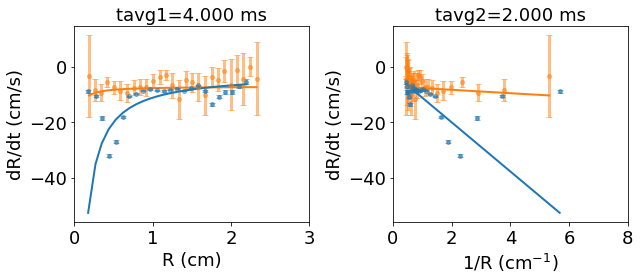

In [74]:
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
# const=0.367466905196615961518568936287512365654517122
PlotMeanRadialVelocities(axs, x_values, y_values, y_err_values, y_hat_values,c='C1') #LR is orange
PlotMeanRadialVelocities(axs, x_values2, y_values2, y_err_values2, y_hat_values2,c='C0') #FK is blue
axs[1].set_xlim([0,8.])
axs[0].set_xlim([0,3.])
# axs[0].set_ylim([-250,10])
# axs[1].set_ylim([-250,10])
axs[0].set_title(f'tavg1={tavg1:.3f} ms',fontsize=fontsize)
axs[1].set_title(f'tavg2={tavg2:.3f} ms',fontsize=fontsize)
plt.tight_layout()
plt.show()

$$
F(R)\propto\frac{dR}{dt} = b + \frac{m}{R}
$$

In [30]:
print(f"varkappa={dict_force_fit['m']:.1f} +- {dict_force_fit['Delta_m']:.1f} cm^2/s (LR)")
# print_dict(dict_force_fit)

varkappa=-1.4 +- 2.1 cm^2/s (LR)


__results__
- having low tavg2 resulted in pooplots
- having high tavg2 looked alright...
- having the DT=0.5s data set for the LR model looks... reasonable...

In [31]:
print(f"varkappa={dict_force_fit2['m']:.1f} +- {dict_force_fit2['Delta_m']:.1f} cm^2/s (FK)")
print_dict(dict_force_fit2)

varkappa=0.7 +- 3.0 cm^2/s (FK)
m=0.6740063586008019
Delta_m=3.0121332670822833
b=-11.986512624451622
Delta_b=5.247699128837651
Rsquared=0.031062491183604955


In [638]:
#estimating the effect
m=dict_force_fit['m']
Delta_m=dict_force_fit['Delta_m']
m2=dict_force_fit2['m']
Delta_m2=dict_force_fit2['Delta_m']
print(f"ratio of mean magnitudes of attraction (FK/LR)")
print(f"m'/m = {(m2+Delta_m2)/(m-Delta_m):.2f} (lower bound)")
print(f"m'/m = {m2/m:.2f} (expected)")
print(f"m'/m = {(m2-Delta_m2)/(m+Delta_m):.2f} (upper bound)")

ratio of mean magnitudes of attraction (FK/LR)
m'/m = 0.07 (lower bound)
m'/m = 0.10 (expected)
m'/m = 0.15 (upper bound)


In [639]:
#DONE: filter the bad points
#TODO: zoom plot to be more visually appealing
#TODO: make the full model measurements into a slide
#TODO: move on to making measurements for the MSD.  make slide.
# TODO: plug ^that into the particle model without a repulsive force.  do we get the same varkappa, D, and death rate density?

## fit a nonlinear model to the FK model's data for dRdt versus R
- no extra terms are revealing an obvious special funciton fit
- this effort can be salvaged for an improved fit routine

In [589]:
#TODO: implement robust_lsq fitting to improve a m/r + b fit 
#TODO: follow last night's written routine for computing 95% CI on these values using bootstrap
#TODO(for data full models): compute 95% CI on the parameters resulting from robust_lsq 

In [640]:
from scipy.optimize import least_squares

In [641]:
#rename specific values
print_dict(dict_force_fit2)
varkappa=dict_force_fit2['m']
b=dict_force_fit2['b']
x=x_values2
y=y_values2
y_err=y_err_values2
y_hat=y_hat_values2

#rename specific values
print_dict(dict_force_fit)
varkappa=dict_force_fit['m']
b=dict_force_fit['b']
x=x_values
y=y_values
y_err=y_err_values
y_hat=y_hat_values

m=-9.524414342485912
Delta_m=1.5173199600729517
b=0.6165884562325896
Delta_b=3.230135571416586
Rsquared=0.8884767751411725
m=-96.6144655639854
Delta_m=20.65793709083657
b=-32.289692683655915
Delta_b=41.347540046887836
Rsquared=0.8077435420429666


In [642]:
from scipy import special as sp

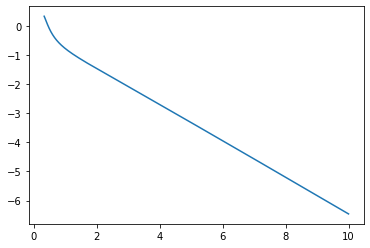

In [643]:
# #TODO: test 2 parameter foo_lst:
# x0 = np.array([1.,1.,1.,0.])
# foo_lst=[sp.kv,sp.kve,sp.iv,sp.eiv,sp.kvp]#sp.write_bessel(a,b,x)
# foo=foo_lst[0]
# def fun(x, t, y):
#     return x[0] / t + x[1] + x[2]*foo(x[3],t) - y
# x0 = np.array([1.,1.,1.,0.])
# def fun(x, t, y):
#     return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y + x[3]

# #DONE: test 1 parameter foo_lst:
# # x0 = np.array([-10,-1.,0.,1.])
# x0 = np.array([varkappa,b,1.,1.,-.1])
# ifoo=lambda x:sp.yv(0,x)
# # ifoo=lambda x:sp.kv(1,x)
# foo_lst=[ifoo,sp.k0,sp.k0e]#,sp.iti0k0,sp.it2i0k0]
# foo=foo_lst[0]
# def fun(x, t, y):
#     return x[0]/(t+x[4]) + x[1] + x[2]*foo(t*x[3]) - y
q=np.arange(0.1,3,0.001)
# w=sp.yv(1,q)
w=sp.yv(1,q)
plt.plot(1/q,w)

In [644]:

#DONE: test 0 parameter foo_lst:
# x0 = np.array([-10,-1.,0.,1.])
x0 = np.array([varkappa,b,])
def fun(x, t, y):
    return x[0]/t + x[1]- y


# #DONE: test 0 parameter foo_lst:
# # x0 = np.array([-10,-1.,0.,1.])
# x0 = np.array([varkappa,b,1.,0.1])
# ifoo=lambda x:sp.yv(0,x)
# def fun(x, t, y):
#     return x[0]/t + x[1] + x[2]*sp.y0(t*x[3]) - y

#     return x[0]/(t+x[4]) + x[1] + x[2]*sp.yv(x[5],t*x[3]) - y


t_train = x
y_train = y
fun(x0,t_train,y_train)

array([ 133.10936396,    4.17838   , -138.52411176, -121.7857884 ,
        -70.15278516,  -56.4181479 ,   -1.49396667,  -17.52087805,
        -35.52738664,  -21.26060121,   -4.81515761,  -15.59414247,
        -13.22067396,   27.2756532 ,   49.91450296,   -8.95865621,
         84.95582795,   82.11055398,   17.51031837,   -3.66650172,
         19.62714285,   90.25705448,    8.6046591 ,  -21.91213522,
        -48.66048379, -113.40467663])

In [645]:
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(x_values2, y_values2))

In [646]:
def generate_data(t, x, noise=0, n_outliers=0, random_state=0):
    
    y = x[0] / t + x[1]
    
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 35
    return y #+ error

In [647]:
least_squares

<function scipy.optimize._lsq.least_squares.least_squares(fun, x0, jac='2-point', bounds=(-inf, inf), method='trf', ftol=1e-08, xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear', f_scale=1.0, diff_step=None, tr_solver=None, tr_options={}, jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})>

In [648]:
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(x_values2, y_values2))

In [649]:
res_lsq = least_squares(fun, x0, args=np.array((t_train, y_train)))#COMMENT HERE bc lsq isn't needed
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))
t_test = t_train
y_test = y_train
y_lsq = generate_data(t_test, res_lsq.x)
y_robust = generate_data(t_test, res_robust.x)


x0    :[-96.61446556 -32.28969268]
lsq   :[-100.20548646  -20.78929436]
robust:[-100.55674716  -20.68282153]


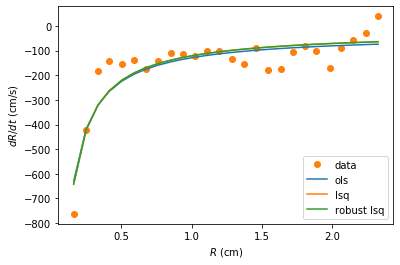

In [650]:
print(f"x0    :{x0}")
print(f"lsq   :{res_lsq.x}")
print(f"robust:{res_robust.x}")

plt.plot(t_train, y_train, 'o', label='data',color='C1')
# plt.plot(t_test, -y_test, label='true')
plt.plot(t_test, y_hat, label='ols')
plt.plot(t_test, y_lsq, label='lsq')
plt.plot(t_test, y_robust, label='robust lsq')
plt.ylabel('$dR/dt$ (cm/s)')
plt.xlabel('$R$ (cm)')
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([-100,10])
plt.legend();
plt.show()

In [654]:
# #TODO: compute apparent basin of attraction for each fit
# print(f"apparent basin of attraction is x0={-varkappa/b:.3f} cm")
# print(f"apparent basin of attraction is x0={-x0[0]/x0[1]:.3f} cm")
# print(f"apparent basin of attraction is x0={-res_lsq.x[0]/res_lsq.x[1]:.3f} cm")
# print(f"apparent basin of attraction is x0={-res_robust.x[0]/res_robust.x[1]:.3f} cm")
#compute apparent basin of attraction for each fit
print(f'''apparent basin of attraction is
-  x0_ols     ={x0[0]/x0[1]:.3f} cm
-  x0_lsq     ={res_lsq.x[0]/res_lsq.x[1]:.3f} cm
-  x0_robust  ={res_robust.x[0]/res_robust.x[1]:.3f} cm''')

apparent basin of attraction is
-  x0_ols     =2.992 cm
-  x0_lsq     =4.820 cm
-  x0_robust  =4.862 cm


In [429]:
# noise = 0.1
# t_min = 0
# t_max = 30
# res_lsq


# (to Methods) tuning the smoothing of dRdt annihilation event data
Jumps were identified in some trajectories involved in the apparent annihilation events.  By removing all data happening before the jumps, the apparent inverse power law dependence of mean radial velocity versus distance between spiral tips was recovered.

In [836]:
#TODO: convert tavg1, tavg2 to nearest navg1 and navg2 using DT.
#TODO: move all those functions I made yesterday to lib
#TODO: add support for use_smoothing=True for given navg1, navg2

#DONE: filter events that look sus
#DONE: filter dRdt events that don't make sense
#DONE: plot several random event_id's
#DONE: plot 1 random event_id
#DONE: verified that mean radial velocities adds time units but not length units
#DONE: verified that the annihilation computation gives units to the distance between particles
#DONE: verify that there is 1 trial for each event_id
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_150_maxdur_150_minrange_0.5_rangethresh_0.1.csv"
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_150_maxdur_150_minrange_0.5_rangethresh_0.1.csv"
df=pd.read_csv(input_fn)
# df2=pd.read_csv(input_fn2)
print(input_fn)

d=df[df[id_col]==event_id]
sz=d[t_col].size

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_150_maxdur_150_minrange_0.5_rangethresh_0.1.csv


In [838]:
d

,pid,pid_deathmate,tdeath,r,theta,phi1,phi2,phi_sum,phi_diff,event_id


In [861]:
#moved to lib
# #DONE: make function that identifies any event_id's that are smaller than a threshold size
# #DONE: use ^that to remove (set difference) that one event preventing a reasonably large navg2 value
# def find_events_insufficient_size(df,size_thresh=200,t_col='tdeath',id_col='event_id'):
#     '''
#     Example Usage:
#     invalid_event_id_lst=find_events_insufficient_size(df,size_thresh=100)
#     '''
#     boo=df.groupby(id_col)[t_col].count()<size_thresh
#     invalid_event_id_lst=list(boo[boo].index.values)
#     return invalid_event_id_lst

# def filter_events_ending_at_large_range(df,rdeath_thresh=0.7,t_col='tdeath',id_col='event_id'):
#     '''
#     Example Usage:
#     valid_event_id_lst=filter_events_ending_at_large_range(df,rdeath_thresh=0.1)
#     '''
#     event_id_lst=sorted(set(df[id_col].values))
#     valid_event_id_lst=[]
#     for event_id in event_id_lst:
#         d=df[df[id_col]==event_id]
#         mint=d[t_col].min()
#         rdeath=d[d[t_col]==mint][x_col].min()
#         if rdeath<rdeath_thresh:
#             valid_event_id_lst.append(event_id)
#     return valid_event_id_lst

In [860]:
invalid_event_id_lst=find_events_insufficient_size(df,size_thresh=200)
invalid_event_id_lst

[1003326000.9998957, 1015136000.9998161]

In [843]:
invalid_event_id_lst=find_events_insufficient_size(df,size_thresh=200)

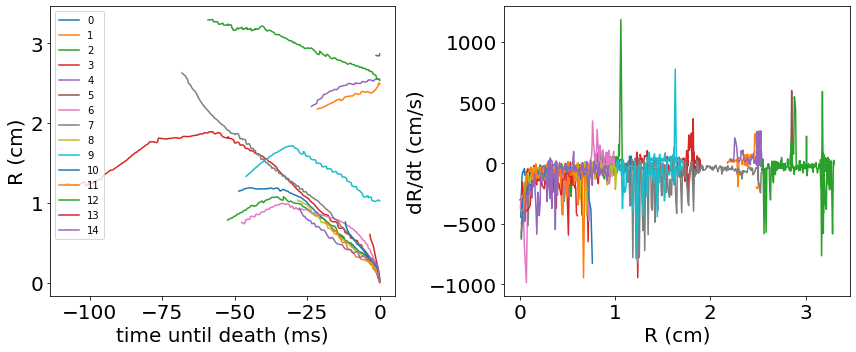

In [618]:
#plot annihilations without filtering directly from csv
x_col='r'
dxdt_col='drdt'
figsize=(12,5)
fig,axs=plt.subplots(figsize=figsize,ncols=2)
for j,event_id in enumerate(event_id_lst):
    d=df[df[id_col]==event_id]
    r_values=d[x_col].values
    t_values=d[t_col].values
    r_values=d['r'].values #cm
    # c_values=d['phi_diff'].values #ms
    # c_values=d['phi_sum'].values #ms
    c_values=d['tdeath'].values #ms

    #simplest possible way to compute speeds
    tscale=0.001 #s per ms
    min_dRdt=-1000
    max_dRdt=10000
    dRdt_values=-1*(r_values[:-1]-r_values[1:])/DT/tscale #cm/s
    R_values = (r_values[:-1]+r_values[1:])/2 #cm
    boo_keep=(dRdt_values>min_dRdt)&(dRdt_values<max_dRdt)
    R_values=R_values[boo_keep]
    dRdt_values=dRdt_values[boo_keep]
    c_values=c_values[:-1][boo_keep]
    t_values=t_values[:-1][boo_keep]
    
    axs[0].plot(-t_values,R_values,label=j)
    axs[1].plot(R_values,dRdt_values,label=j)
    
axs[0].legend()
format_plot(axs[0],xlabel='time until death (ms)',ylabel='R (cm)',fontsize=20,use_loglog=False)
format_plot(axs[1],xlabel='R (cm)',ylabel='dR/dt (cm/s)',fontsize=20,use_loglog=False)
plt.tight_layout()
plt.show()

In [852]:
# #remove any event_id's that end (t_col takes minimum absolute value) at a range of more than 0.5 cm (r > rdeath_thresh)
# def get_annihilation_df_naive(input_fn,
#                             rdeath_thresh=0.7,
#                             min_dRdt=-1000,
#                             max_dRdt=1000,
#                             x_col='r',
#                             dxdt_col='drdt',
#                             t_col='tdeath',
#                             id_col='event_id',
#                             pid_col='pid',
#                             DT=0.025,
#                             DT_sec=0.000025,
#                             size_thresh=200,
#                             printing=False,**kwargs
#                              ):
#     '''
#     Example Usage:
#     df,valid_event_id_lst=get_annihilation_df_naive(input_fn)
#     '''
#     df=pd.read_csv(input_fn)
#     df.sort_values([id_col, t_col], ascending=False, inplace=True)
#     event_id_lst=sorted(set(df[id_col].values))
#     if printing:
#         print(f"{len(event_id_lst)} annihilation events are inputed")
#     valid_event_id_lst=filter_events_ending_at_large_range(df,rdeath_thresh=rdeath_thresh)
#     invalid_event_id_lst=find_events_insufficient_size(df,size_thresh=size_thresh)
#     valid_event_id_lst=list(set(valid_event_id_lst).difference(set(invalid_event_id_lst)))
#     if printing:
#         print(f"{len(valid_event_id_lst)} annihilation events end at a range smaller than {rdeath_thresh} cm.")

#     #TODO: remove all plotting from the following block
#     #plot annihilations without filtering directly from csv
#     df.sort_values([id_col, t_col], ascending=False, inplace=True)
#     df[dxdt_col]=df[x_col].diff()/DT_sec #cm/s
#     boo=np.abs(df[x_col].diff())>DT
# #     for j,event_id in enumerate(valid_event_id_lst):
# #         d=df[df[id_col]==event_id]
# #         df.loc[df[id_col]==event_id,dxdt_col]=d[x_col].diff()/DT_sec #cm/s
      
#     #naive filtering of extreme data
#     boo|=(df[dxdt_col]>=max_dRdt)|(df[dxdt_col]<=min_dRdt)   
#     df.loc[boo,dxdt_col]=np.nan
#     df.dropna(inplace=True)
#     return df,valid_event_id_lst


In [855]:
df,valid_event_id_lst=get_annihilation_df_naive(input_fn)
df.head()

,pid,pid_deathmate,tdeath,r,theta,phi1,phi2,phi_sum,phi_diff,event_id,drdt
21538,18124,18448,27.675,0.932958,2.913796,0.240412,-0.257974,-0.017563,0.498386,1.017116e+09,-103.615087
21539,18124,18448,27.650,0.930811,2.910114,0.242696,-0.260064,-0.017368,0.502760,1.017116e+09,-85.882730
21540,18124,18448,27.625,0.929008,2.906589,0.244944,-0.262081,-0.017137,0.507025,1.017116e+09,-72.110193
21541,18124,18448,27.600,0.927475,2.903225,0.247141,-0.264043,-0.016902,0.511185,1.017116e+09,-61.294807
21542,18124,18448,27.575,0.926157,2.900015,0.249278,-0.265966,-0.016688,0.515244,1.017116e+09,-52.746872


In [856]:
#naive filtering of extreme data
min_dRdt=-1000
max_dRdt=1000
boo=(df[dxdt_col]>=max_dRdt)|(df[dxdt_col]<=min_dRdt) 
sum(boo)

0

In [859]:
len(valid_event_id_lst)

10

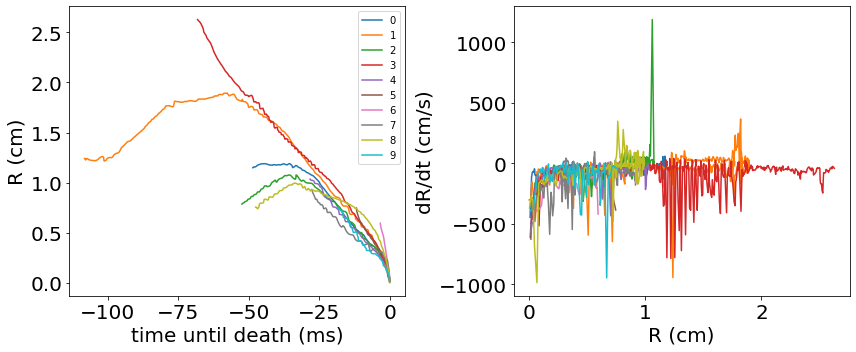

In [858]:
#plot annihilations without filtering directly from csv
x_col='r'
dxdt_col='drdt'
figsize=(12,5)
fig,axs=plt.subplots(figsize=figsize,ncols=2)
for j,event_id in enumerate(valid_event_id_lst):
    d=df[df[id_col]==event_id]
    r_values=d[x_col].values
    t_values=d[t_col].values
    r_values=d['r'].values #cm
    # c_values=d['phi_diff'].values #ms
    # c_values=d['phi_sum'].values #ms
    c_values=d['tdeath'].values #ms

    #simplest possible way to compute speeds
    tscale=0.001 #s per ms
    min_dRdt=-1000
    max_dRdt=10000
    dRdt_values=-1*(r_values[:-1]-r_values[1:])/DT/tscale #cm/s
    R_values = (r_values[:-1]+r_values[1:])/2 #cm
    boo_keep=(dRdt_values>min_dRdt)&(dRdt_values<max_dRdt)
    R_values=R_values[boo_keep]
    dRdt_values=dRdt_values[boo_keep]
    c_values=c_values[:-1][boo_keep]
    t_values=t_values[:-1][boo_keep]
    
    axs[0].plot(-t_values,R_values,label=j)
    axs[1].plot(R_values,dRdt_values,label=j)
    
axs[0].legend()
format_plot(axs[0],xlabel='time until death (ms)',ylabel='R (cm)',fontsize=20,use_loglog=False)
format_plot(axs[1],xlabel='R (cm)',ylabel='dR/dt (cm/s)',fontsize=20,use_loglog=False)
plt.tight_layout()
plt.show()

In [621]:
#GOAL: make a simple/reasonable filter trajectories look funny on the scatter plot of dRdt versus R
#TODO: plot where event_id is not null
#TODO: plot where event_id is null
# input_fn2="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_300_maxdur_150_minrange_0.5_rangethresh_0.1.csv"

In [622]:
# import scipy.stats as stats

# def plot_hist_with_kde(data, ax, bandwidth = 0.3):
#     #set number of bins using Freedman and Diaconis
#     q1 = np.percentile(data,25)
#     q3 = np.percentile(data,75)

#     n = len(data)**(.1/.3)
#     rng = max(data) - min(data)
#     iqr = 2*(q3-q1)
#     bins = int((n*rng)/iqr)

#     x = np.linspace(min(data),max(data),200)

#     kde = stats.gaussian_kde(data)
#     kde.covariance_factor = lambda : bandwidth
#     kde._compute_covariance()

#     ax.plot(x,kde(x),'r') # distribution function
#     ax.hist(data,bins=bins,density=True) # histogram

# # data = np.random.randn(500)
# # hist_with_kde(data,0.25)

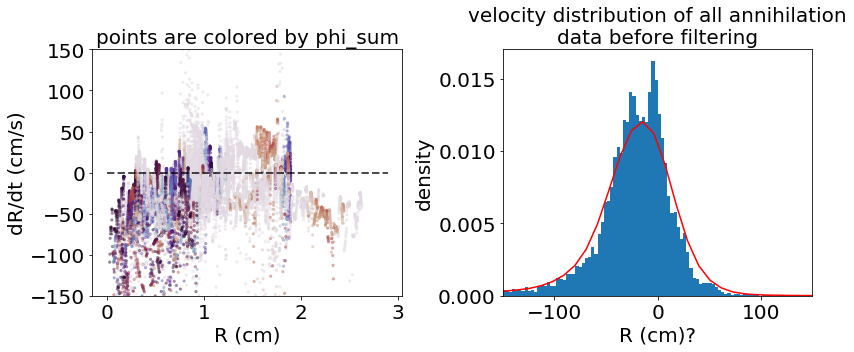

In [686]:
# scatter plot dRdt versus R for a and make a histogram of 
c_col='phi_sum'
figsize=(12,5)
fig,axs=plt.subplots(figsize=figsize,ncols=2)
dRdt_lst=[];R_lst=[];c_lst=[]
for event_id in valid_event_id_lst:
    d=df[df['event_id']==event_id]
    
    # d.sort_values('tdeath',inplace=True,ascending=False)
    r_values=d['r'].values #cm
#     c_values=d['phi_diff'].values #ms
    c_values=d[c_col].values #ms
#     c_values=d['tdeath'].values #ms

    tscale=0.001 #s per ms
    min_dRdt=-1000
    max_dRdt=10000
    dRdt_values=-1*(r_values[:-1]-r_values[1:])/DT/tscale #cm/s
    R_values = (r_values[:-1]+r_values[1:])/2 #cm
    boo_keep=(dRdt_values>min_dRdt)&(dRdt_values<max_dRdt)
    R_values=R_values[boo_keep]
    dRdt_values=dRdt_values[boo_keep]
    c_values=c_values[:-1][boo_keep]
    
    #append the data to a common list
    R_lst.extend(R_values)
    dRdt_lst.extend(dRdt_values)
    c_lst.extend(-c_values)
    #record to original dataframe
    df.loc[df['event_id']==event_id].loc[:-1]['drdt']=dRdt_values
    #(optionally)plot the data
#     plt.scatter(x=R_values,y=dRdt_values,alpha=0.1,s=5,c='gray')#,cmap='Reds')
#     plt.scatter(x=R_values,y=dRdt_values,c=-c_values,alpha=0.6,s=5)#,cmap='Reds')


vmin=-np.pi/4
vmax=np.pi/4
xmax=3
axs[0].plot(np.arange(0,xmax,0.1),0.*np.arange(0,xmax,0.1),'k--',lw=2,alpha=0.7)
axs[0].scatter(x=R_lst,y=dRdt_lst,c=c_lst,alpha=0.4,s=5,cmap='twilight',vmin=vmin,vmax=vmax)

#kernel density estimate of dRdt versus R
# axs[0].scatter(x=R_lst,y=dRdt_lst,c=c_lst,alpha=0.2,s=5,cmap='Reds')
# axs[0].set_xlabel('R cm')
# axs[0].set_ylabel('dR/dt cm/s')
axs[0].set_ylim([-150,150])
axs[0].set_title(f'points are colored by {c_col}',fontsize=20)

#histogram of all dRdt values
plot_hist_with_kde(dRdt_lst, axs[1], bandwidth = 0.3)
# axs[1].hist(np.abs(dRdt_lst))
# axs[1].set_xlabel('dR/dt cm/s')
axs[1].set_xlim([-150,150])
axs[1].set_title('velocity distribution of all annihilation\ndata before the following filtering',fontsize=20)
format_plot(axs[1],xlabel='R (cm)?', ylabel='density',fontsize=20,use_loglog=False)
format_plot(axs[0],xlabel='R (cm)',ylabel='dR/dt (cm/s)',fontsize=20,use_loglog=False)
plt.tight_layout()
plt.show()

In [633]:
# def filter_jumps_dRdt_vs_R(R_values,dRdt_values,minR_thresh=0.25,max_speed_thresh=200,**kwargs):
#     '''filters all positions occuring before the final jump for a single annihilation event.
    
#     R_values and dRdt_values are numpy arrays for a single annihilation event, sorted by time, such that the latest observations occur at the end of the array. 
#     minR_thresh=0.25 #cm
#     max_speed_thresh=200 #cm/s
#     are reasonable values.
#     other values were considered to show sensativity on this filtering
#     '''
#     boo= (R_values<=minR_thresh)|(np.abs(dRdt_values)<=max_speed_thresh)

#     jump_indicies=sorted(np.argwhere(~boo).flatten())
#     if len(jump_indicies)>0:
#         #set boo to false at all positions occuring before the final jump
#         boo[:jump_indicies[-1]]=False
#     return R_values[boo],dRdt_values[boo]
    
# plt.plot(R_values,dRdt_values)
# minR_thresh=0.25 #cm
# max_speed_thresh=200 #cm/s
# R,dRdt=filter_jumps_dRdt_vs_R(R_values,dRdt_values,minR_thresh=minR_thresh,max_speed_thresh=max_speed_thresh)
# plt.plot(R,dRdt)
# plt.xlabel('R (cm)')
# plt.ylabel('dRdt (cm/s)')
# plt.title('any data before a jump was filtered')

In [632]:
# #GOAL: incorporate jump filtering into the pipeline
# #TODO: iterate over event_id_lst

# book =(df['r']>minR_thresh)&(np.abs(df['drdt'])>max_speed_thresh)
# for event_id in event_id_lst:
#     #identify any jumps in this event
#     booki =book&(df[id_col]==event_id)
#     if remove_before_jump and booki[booki].any(): #if there are any jumps
#         #identify the earliest time where a jump occurs
#         max_time=df[booki][t_col].max()
#         bookie=(df[id_col]==event_id)&(df[t_col]>=max_time) #True if a row should be dropped
#         #mark all data for this event to be dropped if it occurs earlier than this time (tdeath is larger than the earliest time)
#         boo |= bookie
    
# # boo= (R_values<=minR_thresh)|(np.abs(dRdt_values)<=max_speed_thresh)
# # jump_indicies=sorted(np.argwhere(~boo).flatten())
# #TODO: compute the index of the final jump that is further than minR_thresh
# #TODO: compute the time of the final jump that is further than minR_thresh
# #TODO: modify boo to true for all observations that occur before the last jump for that event ID

# #after making the boolean index, drop all data that is True

# #DONE: make a histogram of dRdt values and show that there are outliers 
# #DONE: filter by apparent speed
# #DONE: find the latest absolute speeds that is above some threshold speed AND is further than some minimum threshold distance.  label these points as jumps occuring in either of the trajectories, and thus all data after those points should be excluded
# #TODO: show a range of minimum distances work for a reasonable speed

In [631]:
# #DONE: tested uniqueness of event_id
# event_id=event_id_lst[1];
# pid_id=0
# # event_id=event_id_lst[-7];

# print(f"event_id={event_id}")
# # d=df.loc[np.isclose(df['event_id'],event_id)].copy()
# # d=df.loc[np.isclose(df['event_id'],event_id,atol=1e-16)]




# pid_lst=sorted(set(d.pid.values))
# print(pid_lst)


# #print to show each event_id present has only 1 trajectory
# for pid in pid_lst:
#     #select a particular particle
# #     boo=np.isclose(df['event_id'],event_id)&(df[pid_col]==pid)
#     boo=(df[pid_col]==pid)
#     d=df.loc[boo]
#     print(sorted(set(d.event_id.values)))

# # #select a particular particle
# # pid=pid_lst[pid_id]
# # boo=np.isclose(df['event_id'],event_id)&(df[pid_col]==pid)
# # d=df.loc[boo]



# # d.sort_values('tdeath',inplace=True,ascending=False)
# r_values=d['r'].values #cm
# c_values=d['phi_diff'].values #ms
# # c_values=d['phi_sum'].values #ms
# # c_values=d['tdeath'].values #ms

# tscale=0.001 #s per ms
# min_dRdt=-1000
# max_dRdt=10000
# dRdt_values=-1*(r_values[:-1]-r_values[1:])/DT/tscale #cm/s
# R_values = (r_values[:-1]+r_values[1:])/2 #cm
# boo_keep=(dRdt_values>min_dRdt)&(dRdt_values<max_dRdt)
# R_values=R_values[boo_keep]
# dRdt_values=dRdt_values[boo_keep]
# c_values=c_values[:-1][boo_keep]
# d.head()

In [645]:
# fn_trouble=search_for_file()
# fn=os.path.basename(fn_trouble);print(fn)
# ret=compute_event_id(pd.read_csv(fn),fn)
# ret.head()

# df.sort_values(id_col,ascending=False,inplace=True)
# df.head()

In [634]:
# #assert uniqueness of event id
# #assert that there is only one observation for a given event_id
# assert ( (d.groupby('tdeath').count()==1).all().values.all() )

In [729]:
#proof of concept for moving averages
# x=R_values
# tvalues=d[t_col].values
# def moving_average(x, w):
#     return np.convolve(x, np.ones(w), 'valid') / w
# plt.plot(R_values)
# plt.plot(moving_average(x,20))
# plt.plot(moving_average(x,100))
# plt.show()

In [730]:
id_col='event_id'
pid_col='pid'
t_col='tdeath'
minR_thresh=0.25 #cm
max_speed_thresh=0.2 #cm/s
remove_before_jump=True

df=pd.read_csv(input_fn)
# event_id_lst=sorted(set(df.loc[~df[id_col].isna(),id_col].values))
event_id_lst=sorted(set(df[id_col].values))

# DT=sorted(set(df[t_col].values))[0]
tvals=sorted(set(df[t_col].values))
DT=tvals[1]-tvals[0]
assert(DT>0)#if DT<0, then a factor of -1 is needed in a few places...
df['drdt']=df['r'].diff()/DT
#set drdt to zero where pid changes or where tdeath jumps by more than dt
boo=df[t_col].diff()!=-DT # if True, then row will be dropped

In [732]:
# #plot annihilations without filtering directly from csv
# x_col='r'
# dxdt_col='drdt'
# figsize=(12,5)
# fig,axs=plt.subplots(figsize=figsize,ncols=2)
# for j,event_id in enumerate(valid_event_id_lst):
#     d=df[df[id_col]==event_id]
#     r_values=d[x_col].values
#     t_values=d[t_col].values
#     r_values=d['r'].values #cm
#     # c_values=d['phi_diff'].values #ms
#     # c_values=d['phi_sum'].values #ms
#     c_values=d['tdeath'].values #ms

#     #simplest possible way to compute speeds
#     tscale=0.001 #s per ms
#     min_dRdt=-1000
#     max_dRdt=10000
#     dRdt_values=-1*(r_values[:-1]-r_values[1:])/DT/tscale #cm/s
#     R_values = (r_values[:-1]+r_values[1:])/2 #cm
#     boo_keep=(dRdt_values>min_dRdt)&(dRdt_values<max_dRdt)
#     R_values=R_values[boo_keep]
#     dRdt_values=dRdt_values[boo_keep]
#     c_values=c_values[:-1][boo_keep]
#     t_values=t_values[:-1][boo_keep]
    
#     axs[0].plot(t_values,R_values,label=j)
#     axs[1].plot(R_values,dRdt_values,label=j)
    
# axs[0].legend()
# format_plot(axs[0],xlabel='time until death (ms)',ylabel='R (cm)',fontsize=20,use_loglog=False)
# format_plot(axs[1],xlabel='R (cm)',ylabel='dR/dt (cm/s)',fontsize=20,use_loglog=False)
# plt.tight_layout()
# plt.show()

In [733]:
# def compute_event_id(df,input_fn,pid_col='pid',**kwargs):
#     '''computes a unique float that is unique for each event identified here by pid_col and is unique across files.
#     '''
#     #compute event_id
#     # import re
#     fn = os.path.basename(input_fn)
#     # event_id_int = int(float(100*sum([float(s) for s in re.findall(r'-?\d+\.?\d*', fn)])))
#     # event_id_int=float(''.join(re.findall(r'-?\d+\.?\d*', fn)))
#     # event_id_int=float(''.join(re.findall(r'-?\d+\d*', fn)))
#     event_id_int=float('1'+(''.join(re.findall(r'-?\d+\d*',fn))))
#     df['event_id']= event_id_int + df[pid_col] / (1.+df[pid_col].max())
#     return df

# fn=os.path.basename(fn_trouble);print(fn)
# ret=compute_event_id(pd.read_csv(fn),fn)
# pid_lst=sorted(set(ret.pid.values))
# print ( pid_lst ) 

# print ( sorted(set(ret.event_id.values)) )
# print ( sorted(set(ret[ret.pid==pid_lst[0]].event_id.values)) )
# print ( sorted(set(ret[ret.pid==pid_lst[1]].event_id.values)) )



In [863]:
# def moving_average_of_events(df,
#                              valid_event_id_lst=None,
#                              navg=20,
#                              id_col='event_id',
#                              t_col='tdeath',
#                              **kwargs):
#     df.sort_values([id_col, t_col], ascending=False, inplace=True)
#     if valid_event_id_lst is None:
#         event_id_lst = sorted(set(df[id_col].values))
#         valid_event_id_lst=event_id_lst
#     #moving average of df for each event_id
#     for event_id in valid_event_id_lst:
#         bo = df[id_col] == event_id
#         df.loc[bo] = df[bo].rolling(navg).mean()
#     df.dropna(inplace=True)
#     return df

# def smooth_derivative_filter_of_events(df,
#                                        valid_event_id_lst=None,
#                                        DT_sec=0.000025,
#                                        x_col='r',
#                                        dxdt_col='drdt',
#                                        id_col='event_id',
#                                        t_col='tdeath',
#                                        ascending=False,
#                                        navg=21,
#                                        polyorder=3,
#                                        mode='interp',
#                                        **kwargs):
#     '''
#     navg is an odd integer and is the number of frames to average over.
#     polyorder=3 corresponds to cubic.
#     mode='interp' is reasonable for nonperiodic 1D arrays 
#     mode can be 'mirror', 'constant', 'nearest', 'wrap' or 'interp'. wrap is for periodic boundary conditions.
#     DT=0.000025 is in seconds per frame for the highest resolution spiral tip data set I made.
#     '''
#     df.sort_values([id_col, t_col], ascending=False, inplace=True)
#     if valid_event_id_lst is None:
#         event_id_lst = sorted(set(df[id_col].values))
#         valid_event_id_lst=event_id_lst
#     for event_id in valid_event_id_lst:
#         bo = df[id_col] == event_id
#         R_values = df[x_col][bo].values
#         dRdt_values = savgol_filter(x=R_values,
#                                     window_length=navg,
#                                     polyorder=polyorder,
#                                     deriv=1,
#                                     delta=1.0,
#                                     axis=-1,
#                                     mode='interp')
#         df.loc[bo, dxdt_col] = dRdt_values/DT_sec
#     return df

In [864]:
# #DONE: make a get_annihilation_df function that takes navg1,navg2 and kwargs and returns the resulting df
# def get_annihilation_df(input_fn,navg1,navg2,
#                         rdeath_thresh = 0.7,
#                         t_col = 'tdeath',
#                         id_col = 'event_id',
#                         pid_col = 'pid',
#                         x_col = 'r',
#                         dxdt_col = 'drdt',
#                         DT = 0.025,
#                         DT_sec=0.000025,
#                         size_thresh=200,
#                         printing = False,**kwargs):
#     '''first, get_annihilation_df removes any event_id's that end (t_col takes minimum absolute value) at a range of more than 0.5 cm (r > rdeath_thresh)
#     then, get_annihilation_dfcomputes the moving_average_of_events
#     Example Usage:
#     navg1=41
#     navg2=11
#     df,valid_event_id_lst=get_annihilation_df(input_fn,navg1,navg2)
#     data=df,valid_event_id_lst,navg1,navg2
#     '''
#     #load data and filter unreasonable events
#     df = pd.read_csv(input_fn)
#     df.sort_values([id_col, t_col], ascending=False, inplace=True)
#     tvals = sorted(set(df[t_col].values))
#     DT = tvals[1] - tvals[0]
#     event_id_lst = sorted(set(df[id_col].values))
#     valid_event_id_lst=filter_events_ending_at_large_range(df,rdeath_thresh=rdeath_thresh)
#     invalid_event_id_lst=find_events_insufficient_size(df,size_thresh=size_thresh)
#     valid_event_id_lst=list(set(valid_event_id_lst).difference(set(invalid_event_id_lst)))
#     if printing:
#         print(f"{len(event_id_lst)} annihilation events are inputed")
#         print(f"{len(valid_event_id_lst)} annihilation events end at a range smaller than {rdeath_thresh} cm.")

#     #smooth and differentiate data
#     df = moving_average_of_events(df, valid_event_id_lst, navg=navg1, id_col=id_col, t_col=t_col)
#     valid_event_id_lst=filter_events_ending_at_large_range(df,rdeath_thresh=rdeath_thresh)
#     invalid_event_id_lst=find_events_insufficient_size(df,size_thresh=size_thresh)
#     valid_event_id_lst=list(set(valid_event_id_lst).difference(set(invalid_event_id_lst)))
#     df = smooth_derivative_filter_of_events(df,DT=DT_sec,valid_event_id_lst=valid_event_id_lst,
#                                             x_col=x_col,
#                                             dxdt_col=dxdt_col,
#                                             id_col=id_col,
#                                             t_col=t_col,
#                                             ascending=False,
#                                             navg=navg2,
#                                             polyorder=3,
#                                             mode='interp')
#     valid_event_id_lst = filter_events_ending_at_large_range(df, rdeath_thresh=rdeath_thresh)
#     return df,valid_event_id_lst


In [885]:
#TODO(later): update/fork gener_bluf for when I want to give two axes to modify with a plotter function
#DONE: identify the plots I want to use
# done - R versus tdeath baked with a given navg1, navg2
# done - dRdt versus R baked with a given navg1, navg2
# #TODO(later): add axs option to argument decided by type(ax)==type(list())): make functions for plots that I want to use =: foo.  make a get_foo for each foo
# if type(ax)==type(list()):
#     axs=list(ax)
#     #TODO(later): generate a new axis in pdf for each element of axs
#DONE: or just split the two functions... it's straightforward and useful to have them split.
# def get_plotter_annihilations_a(
#                             rdeath_thresh = 0.7,
#                             t_col = 'tdeath',
#                             id_col = 'event_id',
#                             pid_col = 'pid',
#                             x_col = 'r',
#                             dxdt_col = 'drdt',
#                             DT = 0.025,
#                             DT_sec=0.000025,
#                             printing = False,
#                             fontsize=18,
#                             **kwargs):
#     '''
#     Example Usage:
#     plotter_annihilations_a=get_plotter_annihilations_a(**baked_kwargs)
#     plotter_annihilations_a(ax,data)
#     task_list.append(plotter_annihilations_a,data_unbaked_kwargs_tuple)
#     '''
#     def plotter_annihilations_a(ax,data):
#         '''see docstring for get_plotter_annihilations_a'''
#         #         navg1=41, seemed reasonable...
#         #         navg2=11,
#         df,valid_event_id_lst,navg1,navg2=data
#         for j, event_id in enumerate(valid_event_id_lst):
#             d = df[df[id_col] == event_id]
#             R_values = d[x_col].values
#             dRdt_values = d[dxdt_col].values
#             t_values = d[t_col].values
#             ax.plot(-t_values, R_values, label=j)
#             if printing:
#                 print(f"shapes of {j}: {(t_values.shape, R_values.shape, dRdt_values.shape)}")

#         #format the data
#         ax.legend()
#         ax.set_title(f'moving average window = {DT*navg1:.3f} ms\n(navg1={navg1})', fontsize=fontsize)
#         format_plot(ax,
#                     xlabel='time until death (ms)',
#                     ylabel='R (cm)',
#                     fontsize=fontsize,
#                     use_loglog=False)
#         return True
#     return plotter_annihilations_a

# def get_plotter_annihilations_b(
#                             rdeath_thresh = 0.7,
#                             t_col = 'tdeath',
#                             id_col = 'event_id',
#                             pid_col = 'pid',
#                             x_col = 'r',
#                             dxdt_col = 'drdt',
#                             DT = 0.025,
#                             DT_sec=0.000025,
#                             printing = False,
#                             fontsize=18,
#                             **kwargs):
#     '''
#     Example Usage:
#     plotter_annihilations_b=get_plotter_annihilations_a(**baked_kwargs)
#     plotter_annihilations_b(ax,data)
#     task_list.append(plotter_annihilations_a,data_unbaked_kwargs_tuple)
#     '''
#     def plotter_annihilations_b(ax,data):
#         '''see docstring for get_plotter_annihilations_b'''
#         #         navg1=41, seemed reasonable...
#         #         navg2=11,
#         df,valid_event_id_lst,navg1,navg2=data
#         for j, event_id in enumerate(valid_event_id_lst):
#             d = df[df[id_col] == event_id]
#             R_values = d[x_col].values
#             dRdt_values = d[dxdt_col].values
#             t_values = d[t_col].values
#             ax.plot(R_values, dRdt_values, label=j)
#             if printing:
#                 print(f"shapes of {j}: {(t_values.shape, R_values.shape, dRdt_values.shape)}")

#         #format the data
#         ax.set_title(f'Savitzky-Golay window = {DT*navg2:.3f} ms\n(navg2={navg2})', fontsize=fontsize)
#         format_plot(ax,
#                     xlabel='R (cm)',
#                     ylabel='dR/dt (cm/s)',
#                     fontsize=fontsize,
#                     use_loglog=False)
#         return True
#     return plotter_annihilations_b

In [887]:
#DONE: make a nice example of one pair of axes I made
#if __name__=='__main__':
#define inputs
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_150_maxdur_150_minrange_0.5_rangethresh_0.1.csv'
navg1_values=np.arange(1,100,10)
navg2_values=np.arange(5,100,10)

#get plotter functions
plotter_annihilations_a=get_plotter_annihilations_a(
                            rdeath_thresh = 0.7,t_col = 'tdeath',id_col = 'event_id',
                            pid_col = 'pid',x_col = 'r',dxdt_col = 'drdt',
                            DT = 0.025,DT_sec=0.000025,printing = False,fontsize=18)
plotter_annihilations_b=get_plotter_annihilations_b(
                            rdeath_thresh = 0.7,t_col = 'tdeath',id_col = 'event_id',
                            pid_col = 'pid',x_col = 'r',dxdt_col = 'drdt',
                            DT = 0.025,DT_sec=0.000025,printing = False,fontsize=18)

#initialize the simple finite difference dRdt as df
df,valid_event_id_lst=get_annihilation_df_naive(input_fn)
data=(df,valid_event_id_lst,0,0)
task_lst=[(plotter_annihilations_a,data),
           (plotter_annihilations_b,data)]

#generate task_lst by plotting the previous method, which used simple difference to compute dRdt
for navg2 in navg2_values:
    for navg1 in navg1_values:
        #generate the data
        df,valid_event_id_lst=get_annihilation_df(input_fn,navg1,navg2)
        data=(df,valid_event_id_lst,navg1,navg2)
        task_lst.append((plotter_annihilations_a,data))
        task_lst.append((plotter_annihilations_b,data))

In [890]:
# #DONE: test that individual plotter functions work at face value
# #TODO: test that individual plotter functions work in the bluf pipeline
# fig,ax=plt.subplots()
# # plotter,data=task_lst[-10]
# plotter_annihilations_b(ax,(df,valid_event_id_lst,0,0))
# # plotter(ax,data)
# plt.show()

In [1]:
#gener_bluf
bluf_fn='navgs_for_dRdt.pdf'
bluf_dir=os.path.join(trial_folder_name,'fig')
if not os.path.exists(bluf_dir):
    os.mkdir(bluf_dir)
os.chdir(bluf_dir)
bluf_dir=os.path.join(bluf_dir,bluf_fn)
working=gener_bluf(task_lst,bluf_dir)
plt.close()
if working:
    print(f"file saved successfully in {bluf_dir}")

In [ ]:
#KEY RESULT: navg1,navg2 given by 2 ms and 1 ms is in a reasonable/tuned setting for a a dRdt signal that filters high frequency noise 
#TODO: check whether the periods make sense on the wiggles in R versus tdeath. let this inform the choice of navg1
#TODO: include ^this tuned filtering in the varkappa measurement pipeline
#TODO: test ^this filtering in ^that pipeline by testing varkappa==5 in the particle model standard
#TODO: measure varkappa for the full and particle models

#TODO(later): consider dev for the particle averaged measurement of D from input_fn of one wrapped/unwrapped trajectory file
#TODO(later): introduce a aggregate to one csv call
#TODO(later): consider repeating ^this bluf generation for the particle averaged measurement for the known/full model's 

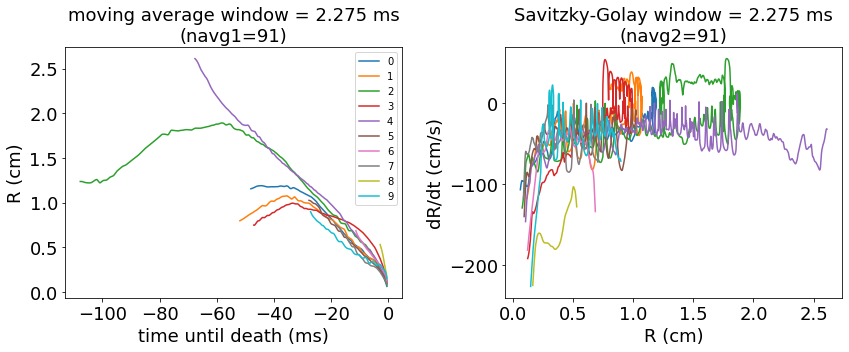

In [765]:
#DONE: define the lists of example plotter tasks
#DONE: test example works
#DONE: identify the plots I want to use
# - R versus tdeath baked with a given navg1, navg2
# - dRdt versus R baked with a given navg1, navg2
#DONE: make functions for plots that I want to use =: foo.  make a get_foo for each foo
#DONE: make a get_df function that takes navg1,navg2 and kwargs and returns the resulting df

#DONE: make a nice example of one pair of axes I made
#DONE: adapt ^this to loop over navg1,navg2 values
#DONE: make a new task_list with ^those new two functions
#DONE: test that I can generate the data within a reasonable amount of time
#DONE: plot the data using bluf
#TODO: make and interpret the resulting .pdf...

#TODO: move on to next MVP for an email update tonight.../?
#TODO(later): dev a procedural filtering method for raw msd aggregated from at least one wrapped/unwrapped trajectory file
#TODO(later?/*sniff*): dev a routine that generates and then aggregates a df_msd from a folder of wrapped/unwrapped trajectories
#TODO(later?/*sniff*): dev a routine that bootstraps a df_emsd from a given df_msd
#TODO(later?/*sniff*): convert an existing plot to get_plotter_msd_a,b
#TODO(later?/*sniff*): generate a bluf of MSD's resulting from 

In [746]:
#TODO: plot ^this to .pdf for a grid search of navg1,navg2 values
#TODO: initialize bluf to a reasonable /fig/ in trial_folder_name    
#TODO: make sure the .pdf saved right.
#TODO: look over pdf and choose some navg1,navg2 values that I like
#TODO: perform bootstrapping for those values
#TODO: for the same window lengths, perform bootstrapping on the low resolution LR data
#TODO: for the same window lengths, perform bootstrapping on the high resolution FK data
#TODO: for the same window lengths, perform bootstrapping on the low resolution FK data

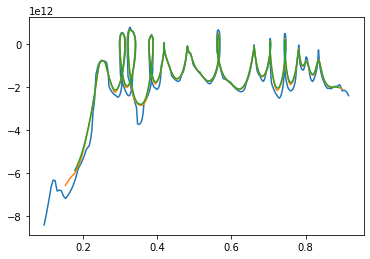

In [516]:
r_values=d['r'].values #cm
dRdt_values=-1*(r_values[:-1]-r_values[1:])/DT/tscale #cm/s
R_values=(r_values[:-1]+r_values[1:])/2
plt.plot(R_values,dRdt_values)

x=moving_average(R_values,20)
dRdt_values=-1*(x[:-1]-x[1:])/DT/tscale #cm/s
R_values=(x[:-1]+x[1:])/2
plt.plot(R_values,dRdt_values)


x=moving_average(R_values,10)
dRdt_values=-1*(x[:-1]-x[1:])/DT/tscale #cm/s
R_values=(x[:-1]+x[1:])/2
plt.plot(R_values,dRdt_values)


plt.show()

((1059,), (1059,))

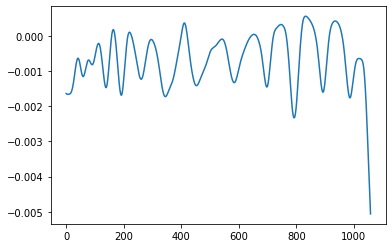

In [529]:
from scipy.signal import savgol_filter

# apply a Savitzky-Golay filter to R(t)
#TODO: use Savitzky-Golay Differentiation Filter to compute dRdt
navg=21
polyorder=3#cubic
mode='interp'#'mirror', 'constant', 'nearest', 'wrap' or 'interp'
dRdt_values=savgol_filter(x=R_values, window_length=navg, polyorder=polyorder, deriv=1, delta=1.0, axis=-1, mode='interp')
plt.plot(dRdt_values)
#TODO: verify the periodicity of R versus time is indeed characteristic of spiral wave rotations (WJ says typically T~100ms)
#TODO: make the particle model be able to vary the basin of attraction
#TODO: find old result for the effect of varying x0 on death rates

dRdt_values.shape,R_values.shape

In [ ]:
# #DONE: find example of task_lst
# #define an example plotter_function
# def my_plotter_function(ax, data):
#     '''a plotter_function as an example'''
#     x_values, y_values, c_values = np.array(data).T
#     c_values = np.abs(c_values)
#     s = 25
#     alpha = .4
#     xlabel = 'xlabel'
#     ylabel = 'ylabel'
#     vmin = 0#np.min(c_values)
#     vmax = 800#np.max(c_values)
#     ax.scatter(x=-1*x_values,
#                y=y_values-x_values**2,
#                c=c_values*np.abs(x_values),
#                alpha=alpha,
#                s=s*np.sqrt(np.abs(x_values)),
#                vmin=vmin,
#                vmax=vmax,
#                cmap='hsv')
#     format_plot(ax, xlabel, ylabel)
#     return True

Qualitative Reasoning on the effect of basin of attraction on death rate exponent:
- A small basin of attraction would impact high densities more than lower densities
- --> the exponent would be (smaller/larger?) for larger basins of attraction
- 

ValueError: 'c' argument has 1089 elements, which is not acceptable for use with 'x' with size 1059, 'y' with size 1059.

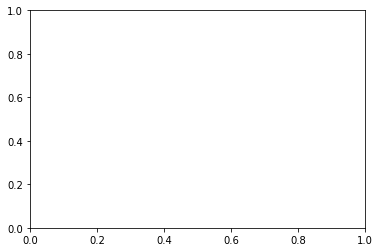

In [518]:
plt.scatter(x=R_values,y=dRdt_values,c=-c_values,alpha=0.6,s=5,cmap='Reds')

In [59]:
# # df[df.event_id.isnull()]
# #merge all csv files into one big-ol' csv file
# #save_fn=f'annihilations_minr_{min_range}_mindur_{min_duration}.csv'
# save_fn=kwargs['folder_out_name']+'.csv'
# file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),save_fn)
# reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
# print('results saved in:')
# print(file_out)

# compute_event_id(df,input_fn)

pid_lst=[20424]


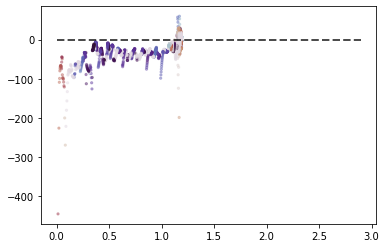

In [60]:
#plot phase information as the colors in dRdt versus R
# d.sort_values('tdeath',inplace=True,ascending=False)
r_values=d['r'].values #cm
c_values=d['phi_diff'].values #ms
# c_values=d['phi_sum'].values #ms
# c_values=d['tdeath'].values #ms

tscale=0.001 #s per ms
min_dRdt=-1000
max_dRdt=10000
dRdt_values=-1*(r_values[:-1]-r_values[1:])/DT/tscale #cm/s
R_values = (r_values[:-1]+r_values[1:])/2 #cm
boo_keep=(dRdt_values>min_dRdt)&(dRdt_values<max_dRdt)
R_values=R_values[boo_keep]
dRdt_values=dRdt_values[boo_keep]
c_values=c_values[:-1][boo_keep]

vmin=-np.pi/4
vmax=np.pi/4
xmax=3
pid_lst=sorted(set(d.pid.values))
print(f"pid_lst={pid_lst}")
plt.plot(np.arange(0,xmax,0.1),0.*np.arange(0,xmax,0.1),'k--',lw=2,alpha=0.7)
plt.scatter(x=R_values,y=dRdt_values,c=c_values,alpha=0.4,s=5,cmap='twilight',vmin=vmin,vmax=vmax)
plt.show()

In [376]:
#moved to lib and added
# def compute_event_id(df,input_fn,pid_col='pid'):
#     '''computes a unique float that is unique for each event identified here by pid_col and is unique across files.
#     fn = os.path.basename(input_fn)
#     event_id_int = int(float(100*sum([float(s) for s in re.findall(r'-?\d+\.?\d*', fn)])))
#     df['event_id']=event_id_int+df['pid']/df['pid'].max()
#     '''
#     #compute event_id
#     fn = os.path.basename(input_fn)
#     event_id_int = int(float(100*sum([float(s) for s in re.findall(r'-?\d+\.?\d*', fn)])))
#     df['event_id']=event_id_int+df['pid']/df['pid'].max()
#     return df

# def produce_one_csv(list_of_files, file_out, encoding="utf-8",provide_event_id=True,pid_col='pid',**kwargs):
#     '''Consolidate all csv files into one object.
#     if provide_event_id is true, then a unique event_id
#     is provided for each event using compute_event_id.'''
#     if provide_event_id:
#         df = pd.concat([compute_event_id(pd.read_csv(file).reset_index(),input_fn=file,pid_col=pid_col) for file in list_of_files])
#     else:
#         df = pd.concat([pd.read_csv(file).reset_index() for file in list_of_files])
#     df.to_csv(file_out, index=False, encoding=encoding)
#     return os.path.abspath(file_out)

1

# visualizing mean radial velocities in the time leading up to annihilation for the particle models

## the effect of removing the attractive force for the annihilation events

In [5]:
#compute the mean radial velocities
#particle results for DT=0.25ms with an attractive 1/r force
input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv"
output_fn=save_mean_radial_velocities(input_fn,t_col='tdeath',bins=30)

#remove the attractive 1/r force
input_fn2="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/annihilations_minr_1_mindur_20.csv"
output_fn2=save_mean_radial_velocities(input_fn2,t_col='tdeath',bins=30)

KeyboardInterrupt: 

In [1]:
1

1

In [ ]:
df_drdt=pd.read_csv(output_fn)
df_drdt2=pd.read_csv(output_fn2)
df_drdt.head()

In [ ]:
df=df_drdt2.copy()
rmin=0.3 #cm
rmax=5 #cm

r_values=df['r'].values
drdt_values=df['drdt'].values
Delta_r_values=df['Delta_r'].values
Delta_drdt_values=df['Delta_drdt'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit2=dict_force_fit
y_hat_values2=y_hat_values.copy()
x_values2=x_values.copy()
y_values2=y_values.copy()
y_err_values2=y_err_values.copy()

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit2)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ninput_fn: {input_fn2}")

In [ ]:
df=df_drdt
rmin=0.3 #cm
rmax=5 #cm

r_values=df['r'].values
drdt_values=df['drdt'].values
Delta_r_values=df['Delta_r'].values
Delta_drdt_values=df['Delta_drdt'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ninput_fn: {input_fn}")

In [ ]:
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
PlotMeanRadialVelocities(axs, x_values, y_values, y_err_values, y_hat_values,c='C2')
PlotMeanRadialVelocities(axs, x_values2, y_values2, y_err_values2, y_hat_values2,c='C4')
plt.tight_layout()
plt.show()

For the particle model,
$$
F(R)\propto\frac{dR}{dt} = b + \frac{m}{R}
$$

In [ ]:
#estimating the effect
m=dict_force_fit['m']
Delta_m=dict_force_fit['Delta_m']
m2=dict_force_fit2['m']
Delta_m2=dict_force_fit2['Delta_m']
print(f"m'/m = {(m2+Delta_m2)/(m-Delta_m):.2f} (lower bound)")
print(f"m'/m = {m2/m:.2f} (expected)")
print(f"m'/m = {(m2-Delta_m2)/(m+Delta_m):.2f} (upper bound)")

In [6]:
save_mean_radial_velocities

<function lib.routines.compute_mean_radial_velocities.save_mean_radial_velocities(input_fn, t_col='tdeath', output_fn=None, bins='auto')>

## the effect of doubling the attractive force

In [13]:
#compute the mean radial velocities
#particle results for DT=0.25ms with an attractive 1/r force
input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv"
output_fn=save_mean_radial_velocities(input_fn,t_col='tdeath',bins=30)

#double the attractive 1/r force
input_fn2="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_10/annihilations_minr_1_mindur_20.csv"
output_fn2=save_mean_radial_velocities(input_fn2,t_col='tdeath',bins=30)

In [14]:
df_drdt=pd.read_csv(output_fn)
df_drdt2=pd.read_csv(output_fn2)
df_drdt.head()

,r,drdt,Delta_r,Delta_drdt,p_r,p_drdt,counts
0,0.156757,-0.089044,0.001344,0.003893,0.240967,0.068338,7453
1,0.366495,-0.038706,0.000883,0.002319,0.524902,0.290752,22533
2,0.597870,-0.024338,0.000698,0.001752,0.928901,0.116687,37501
3,0.827650,-0.015665,0.000599,0.001549,0.710237,0.903064,51408
4,1.059789,-0.011730,0.000528,0.001456,0.516333,0.946471,59873


In [15]:
df=df_drdt2.copy()
rmin=0.3 #cm
rmax=5 #cm

r_values=df['r'].values
drdt_values=df['drdt'].values
Delta_r_values=df['Delta_r'].values
Delta_drdt_values=df['Delta_drdt'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit2=dict_force_fit
y_hat_values2=y_hat_values.copy()
x_values2=x_values.copy()
y_values2=y_values.copy()
y_err_values2=y_err_values.copy()

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit2)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ninput_fn: {input_fn2}")

the ols fit for particle model:
m=-0.023272558805513037
Delta_m=0.0017948664503338518
b=0.0011579403075220335
Delta_b=0.0015635074520903396
Rsquared=0.9714224111462698
Nobs= 17548 +- 9348

input_fn: /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_10/annihilations_minr_1_mindur_20.csv


In [16]:
df=df_drdt
rmin=0.3 #cm
rmax=5 #cm

r_values=df['r'].values
drdt_values=df['drdt'].values
Delta_r_values=df['Delta_r'].values
Delta_drdt_values=df['Delta_drdt'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ninput_fn: {input_fn}")

the ols fit for particle model:
m=-0.015196979154674545
Delta_m=0.0005095824745029999
b=0.0020409886450991743
Delta_b=0.00044625909406630017
Rsquared=0.9947592579603567
Nobs= 40099 +- 22365

input_fn: /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv


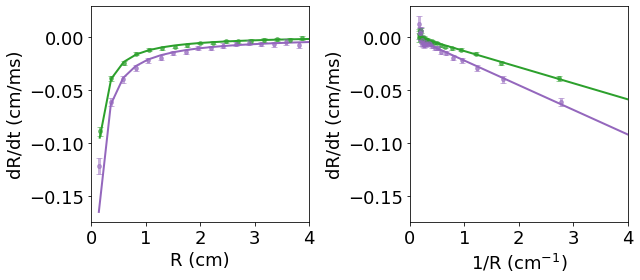

In [17]:
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
PlotMeanRadialVelocities(axs, x_values, y_values, y_err_values, y_hat_values,c='C2')
PlotMeanRadialVelocities(axs, x_values2, y_values2, y_err_values2, y_hat_values2,c='C4')
plt.tight_layout()
plt.show()

For the particle model,
$$
F(R)\propto\frac{dR}{dt} = b + \frac{m}{R}
$$

In [25]:
#estimating the effect
m=dict_force_fit['m']
Delta_m=dict_force_fit['Delta_m']
m2=dict_force_fit2['m']
Delta_m2=dict_force_fit2['Delta_m']
print(f"m'/m = {(m2+Delta_m2)/(m-Delta_m):.2f} (lower bound)")
print(f"m'/m = {m2/m:.2f} (expected)")
print(f"m'/m = {(m2-Delta_m2)/(m+Delta_m):.2f} (upper bound)")

m'/m = 1.37 (lower bound)
m'/m = 1.53 (expected)
m'/m = 1.71 (upper bound)


## the effect of halving the random diffusive force

In [26]:
#compute the mean radial velocities
# #particle results for DT=0.25ms with an attractive 1/r force
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv"
# output_fn=save_mean_radial_velocities(input_fn,t_col='tdeath',bins=30)

#double the attractive 1/r force
input_fn2="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_1_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv"
output_fn2=save_mean_radial_velocities(input_fn2,t_col='tdeath',bins=30)

In [27]:
df_drdt=pd.read_csv(output_fn)
df_drdt2=pd.read_csv(output_fn2)
df_drdt.head()

,r,drdt,Delta_r,Delta_drdt,p_r,p_drdt,counts
0,0.156757,-0.089044,0.001344,0.003893,0.240967,0.068338,7453
1,0.366495,-0.038706,0.000883,0.002319,0.524902,0.290752,22533
2,0.597870,-0.024338,0.000698,0.001752,0.928901,0.116687,37501
3,0.827650,-0.015665,0.000599,0.001549,0.710237,0.903064,51408
4,1.059789,-0.011730,0.000528,0.001456,0.516333,0.946471,59873


In [28]:
df=df_drdt2.copy()
rmin=0.3 #cm
rmax=5 #cm

r_values=df['r'].values
drdt_values=df['drdt'].values
Delta_r_values=df['Delta_r'].values
Delta_drdt_values=df['Delta_drdt'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit2=dict_force_fit
y_hat_values2=y_hat_values.copy()
x_values2=x_values.copy()
y_values2=y_values.copy()
y_err_values2=y_err_values.copy()

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit2)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ninput_fn: {input_fn2}")

the ols fit for particle model:
m=-0.012368627292462943
Delta_m=0.00046133167889566255
b=0.0013424429741814457
Delta_b=0.00040301948242705394
Rsquared=0.9935237713304502
Nobs= 42752 +- 22608

input_fn: /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_1_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv


In [29]:
df=df_drdt
rmin=0.3 #cm
rmax=5 #cm

r_values=df['r'].values
drdt_values=df['drdt'].values
Delta_r_values=df['Delta_r'].values
Delta_drdt_values=df['Delta_drdt'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ninput_fn: {input_fn}")

the ols fit for particle model:
m=-0.015196979154674545
Delta_m=0.0005095824745029999
b=0.0020409886450991743
Delta_b=0.00044625909406630017
Rsquared=0.9947592579603567
Nobs= 40099 +- 22365

input_fn: /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv


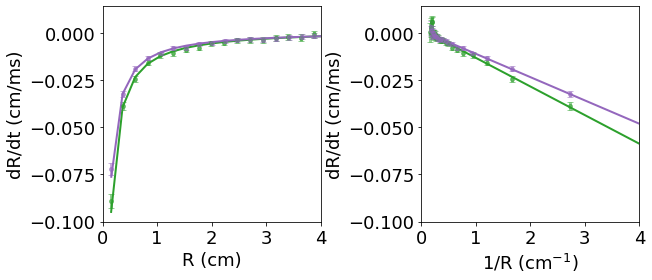

In [30]:
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
PlotMeanRadialVelocities(axs, x_values, y_values, y_err_values, y_hat_values,c='C2')
PlotMeanRadialVelocities(axs, x_values2, y_values2, y_err_values2, y_hat_values2,c='C4')
plt.tight_layout()
plt.show()

For the particle model,
$$
F(R)\propto\frac{dR}{dt} = b + \frac{m}{R}
$$

In [31]:
#estimating the effect
m=dict_force_fit['m']
Delta_m=dict_force_fit['Delta_m']
m2=dict_force_fit2['m']
Delta_m2=dict_force_fit2['Delta_m']
print(f"m'/m = {(m2+Delta_m2)/(m-Delta_m):.2f} (lower bound)")
print(f"m'/m = {m2/m:.2f} (expected)")
print(f"m'/m = {(m2-Delta_m2)/(m+Delta_m):.2f} (upper bound)")

m'/m = 0.76 (lower bound)
m'/m = 0.81 (expected)
m'/m = 0.87 (upper bound)


# TODO: quick and dirty angular histogram of many angles for a given time/range before death
then, angular plots over many values
- TODO: overlay several times/ranges to show timescale/engthscale of orientation
- TODO: filter by min_duration and by min_range simultaneously
- TODO: compute the mean_unsigned_angle_between versus t_death_values. 

then, visualizations
- TODO: plot the mean_unsigned_angle_between versus t_death_values. 
    - overlay with background of many individual events / standard deviation
- TODO: plot the range_values versus t_death_values. 
    - overlay with background of many individual events / standard deviation
- TODO: plot the range_values versus mean_unsigned_angle_between. 
    - overlay with background of many individual events / standard deviation

# Measuring The Effect of Forces in Terms of Directional Preferences between Spiral Tips that annihilate

# visualize angular histograms for a given model

## Luo-Rudy

In [25]:
#LR results for DT = 0.5 ms
modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #LR results for DT = 0.025 ms
#annihilations aggregated
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # #creations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'


# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.025 ms


# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
df.head()

,pid,pid_deathmate,tdeath,phi1,phi2,phi_sum,phi_diff,r,theta
0,7740,7710,21.400,0.667985,0.750684,0.082698,1.418669,2.711634,2.360337
1,7740,7710,21.375,0.574328,0.751892,0.177564,1.326221,2.714238,2.374371
2,7740,7710,21.350,0.570388,0.753465,0.183078,1.323853,2.715064,2.453336
3,7740,7710,21.325,0.566287,0.755052,0.188765,1.321338,2.715846,2.457085
4,7740,7710,21.300,0.562026,0.756650,0.194624,1.318676,2.716587,2.460970


In [26]:
#heretim
#TODO: screenshot LR
#TODO: screenshot FK
#TODO: screenshot LR with small time step
#TODO: visualize on same screen. interpret.
#TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

In [27]:
#slice df to a given tdeath
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #FK
# tA=t_values[0]#.4
# tB=t_values[9]#4.
# tC=t_values[49]#20.
#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[79]#15]#39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values


ax_lst=[2,1,0]
c='C1'
color_lst=[c,c,c]
# color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.025, 0.2, 2.0) milliseconds.


In [28]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*2
symmetrize=False
density=True

In [29]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [30]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 12.


In [31]:
from lib.viewer import *

model is luo-rudy
considering angles at times (tC,tB,tA)=(-2.0, -0.2, -0.025) milliseconds.


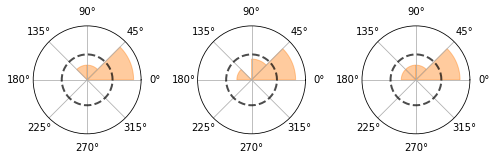

In [32]:
import matplotlib.pyplot as plt
import numpy as np


# Construct figure and axis to plot on
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,3*y0])
plt.tight_layout()
print(f'model is {modelname}')
print(f"considering angles at times (tC,tB,tA)={(-tC,-tB,-tA)} milliseconds.")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.show()

In [33]:
#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"


# #LR results for DT = 0.025 ms
#annihilations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # #creations aggregated
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'


# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
# df.head()

In [34]:
#slice df to a given tbirth
t_values=sorted(set(df.tbirth.values))

# #FK
# tA=t_values[0]#.4
# tB=t_values[9]#4.
# tC=t_values[49]#20.
#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[79]#15]#39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tbirth==tA].theta.values
anglesB=df[df.tbirth==tB].theta.values
anglesC=df[df.tbirth==tC].theta.values

ax_lst=[0,1,2]
color_lst=[c,c,c]
# color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.025, 0.2, 2.0) milliseconds.


In [35]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [36]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 114.


model is luo-rudy
considering angles at times (tA,tB,tC)=(0.025, 0.2, 2.0) milliseconds.


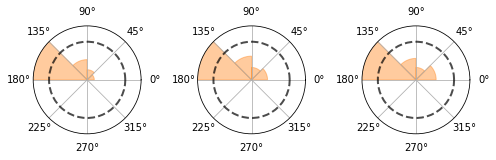

In [37]:
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,2*y0])
plt.tight_layout()
print(f'model is {modelname}')
print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")
plt.show()

## Fenton-Karma

In [55]:
#LR results for DT = 0.5 ms
modelname='fenton-karma'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"


input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv"


# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
df.head()

,pid,pid_deathmate,tdeath,phi1,phi2,phi_sum,phi_diff,r,theta
0,43,40,94.850,0.955973,1.256336,2.212309,0.300363,2.315152,2.185235
1,43,40,94.825,0.941137,1.262894,2.204032,0.321757,2.322729,2.189928
2,43,40,94.800,0.937732,1.268565,2.206297,0.330833,2.329046,2.203861
3,43,40,94.775,0.932547,1.273981,2.206528,0.341434,2.334989,2.207634
4,43,40,94.750,0.929888,1.278925,2.208813,0.349036,2.340173,2.211704


In [56]:
#slice df to a given tdeath
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #FK
tA=t_values[0]#.4
tB=t_values[9]#4.
tC=t_values[99]#49]#20.
# #LR
# tA=t_values[0]
# tB=t_values[7]
# tC=t_values[79]#15]#39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values


ax_lst=[2,1,0]
c='C0'
color_lst=[c,c,c]
# color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.025, 0.25, 2.5) milliseconds.


In [57]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*4
symmetrize=False
density=True

In [58]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [59]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 289.


In [60]:
from lib.viewer import *

model is fenton-karma
considering angles at times (tC,tB,tA)=(-2.5, -0.25, -0.025) milliseconds.


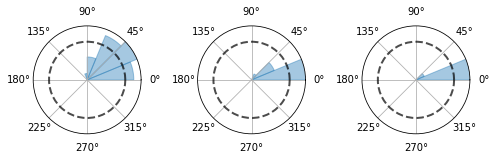

In [61]:
import matplotlib.pyplot as plt
import numpy as np


# Construct figure and axis to plot on
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,2*y0])
plt.tight_layout()
print(f'model is {modelname}')
print(f"considering angles at times (tC,tB,tA)={(-tC,-tB,-tA)} milliseconds.")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.show()

In [26]:
#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"

# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"

# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/annihilations/ic001.21_traj_sr_600_mem_0_annihilations.csv"
df=pd.read_csv(input_fn)
# df.head()

In [27]:
#slice df to a given tbirth
t_values=sorted(set(df.tbirth.values))

# #FK
# tA=t_values[0]#.4
# tB=t_values[9]#4.
# tC=t_values[49]#20.
# #LR
# tA=t_values[0]
# tB=t_values[7]
# tC=t_values[79]#15]#39]

print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")

anglesA=df[df.tbirth==tA].theta.values
anglesB=df[df.tbirth==tB].theta.values
anglesC=df[df.tbirth==tC].theta.values

ax_lst=[0,1,2]
color_lst=[c,c,c]
# color_lst=['C0','C1','C2']
angle_lst=[anglesA,anglesB,anglesC]

considering angles at times (tA,tB,tC)=(0.4, 4.0, 40.0) milliseconds.


In [28]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [29]:
print(f"the number of events considered is {anglesA.shape[0]}.")

the number of events considered is 7866.


model is fenton-karma
considering angles at times (tA,tB,tC)=(0.4, 4.0, 40.0) milliseconds.


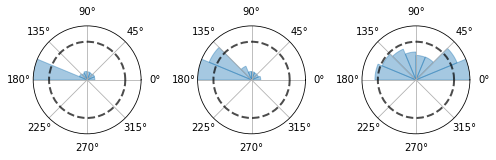

In [30]:
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)

# Visualise by area of bins
for i,angles,color in zip(ax_lst,angle_lst,color_lst):
    circular_hist(axs[i], x=angles,color=color,edgecolor=color,**kwargs)
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,2*y0])
plt.tight_layout()
print(f'model is {modelname}')
print(f"considering angles at times (tA,tB,tC)={(tA,tB,tC)} milliseconds.")
plt.show()

# overlay angular histograms for the Luo-Rudy and Fenton-Karma models.

### for annihilations

In [31]:
#DONE: verified that fenton-karma is blue
#DONE: get all annihilation angles in one place
#DONE: overlay
#DONE: get all annihilation angles in one place
#DONE: overlay

In [4]:
#times of 3 snapshots
tA=.4
tB=4
tC=20

#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# df_lr=pd.read_csv(input_fn)

# #LR results for DT = 0.025 ms
#annihilations aggregated
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # #creations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'

df_lr=pd.read_csv(input_fn)
# #FK results for DT = 0.4 ms
# #annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
df_fk=pd.read_csv(input_fn)

# input_fn=search_for_file()

#TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

#slice df to a given tdeath
df=df_lr.copy()
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #LR
# tA=t_values[0]
# tB=t_values[7]
# tC=t_values[79]#15]#39]

string=f"considering angles at times {(-tC,-tB,-tA)} milliseconds (LR)."
print(string)
string_LR=string

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values

angle_lst=[anglesA,anglesB,anglesC]
angle_lst_LR=angle_lst

#slice df to a given tdeath
df=df_fk.copy()
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

# #FK
# tA=0.4#t_values[0]#.4
# tB=4.#t_values[9]#4.
# tC=40#t_values[99]#20.

string=f"considering angles at times {(-tC,-tB,-tA)} milliseconds (FK)."
print(string)
string_FK=string

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values

ax_lst=[2,1,0]
angle_lst=[anglesA,anglesB,anglesC]
angle_lst_FK=angle_lst

considering angles at times (-20, -4, -0.4) milliseconds (LR).
considering angles at times (-20, -4, -0.4) milliseconds (FK).


In [280]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*2
symmetrize=False
density=True

In [281]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [282]:
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")

the number of events considered is 3010. (FK)
the number of events considered is 12. (LR)


these are annihilations for FK (blue) and LR (orange)
considering angles at the times:
considering angles at times (-20, -4, -0.4) milliseconds (FK).
considering angles at times (-20, -4, -0.4) milliseconds (LR).
the number of events considered is 3010. (FK)
the number of events considered is 12. (LR)


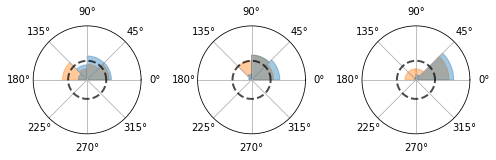

In [283]:
#visualise by area of bins
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)
for i,angles in zip(ax_lst,angle_lst_LR):
    circular_hist(axs[i], x=angles,color='C1',edgecolor='C1',**kwargs)
    
for i,angles in zip(ax_lst,angle_lst_FK):
    circular_hist(axs[i], x=angles,color='C0',edgecolor='C0',**kwargs)

for i in ax_lst:
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,4*y0])
    
#print bluf
print(f'these are annihilations for FK (blue) and LR (orange)')
print(f"considering angles at the times:")
print(string_FK)
print(string_LR)
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.tight_layout()
plt.show()

### repeat for creations

In [220]:
# #FK results for DT = 0.4 ms
# # #creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"
df_fk=pd.read_csv(input_fn)

#LR results for DT = 0.5 ms
#creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/creations_minr_1.0_mindur_20.0.csv"
df_lr=pd.read_csv(input_fn)

In [44]:
#TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

In [221]:
#slice df to a given tdeath
df=df_lr
# t_values=sorted(set(df.tdeath.values))
t_values=sorted(set(df.tbirth.values))

#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[79]#15]#39]

string=f"considering angles at times {(tA,tB,tC)} milliseconds (LR)."
print(string)
string_LR=string

# anglesA=df[df.tdeath==tA].theta.values
# anglesB=df[df.tdeath==tB].theta.values
# anglesC=df[df.tdeath==tC].theta.values

anglesA=df[df.tbirth==tA].theta.values
anglesB=df[df.tbirth==tB].theta.values
anglesC=df[df.tbirth==tC].theta.values

angle_lst=[anglesA,anglesB,anglesC]
angle_lst_FK=angle_lst

#slice df to a given tdeath
df=df_fk
# t_values=sorted(set(df.tdeath.values))
t_values=sorted(set(df.tbirth.values))

#FK
tA=t_values[0]#.4
tB=t_values[9]#4.
tC=t_values[99]#20.

string=f"considering angles at times {(tA,tB,tC)} milliseconds (FK)."
print(string)
string_FK=string

# anglesA=df[df.tdeath==tA].theta.values
# anglesB=df[df.tdeath==tB].theta.values
# anglesC=df[df.tdeath==tC].theta.values

anglesA=df[df.tbirth==tA].theta.values
anglesB=df[df.tbirth==tB].theta.values
anglesC=df[df.tbirth==tC].theta.values

ax_lst=[0,1,2]
angle_lst=[anglesA,anglesB,anglesC]
angle_lst_LR=angle_lst

considering angles at times (0.5, 4.0, 40.0) milliseconds (LR).
considering angles at times (0.4, 4.0, 40.0) milliseconds (FK).


In [222]:
#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*4
symmetrize=False
density=True

In [223]:
kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

In [224]:
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")

the number of events considered is 3853. (FK)
the number of events considered is 7866. (LR)


these are creations for FK (blue) and LR (orange)
considering angles at the times:
considering angles at times (0.4, 4.0, 40.0) milliseconds (FK).
considering angles at times (0.5, 4.0, 40.0) milliseconds (LR).
the number of events considered is 3853. (FK)
the number of events considered is 7866. (LR)


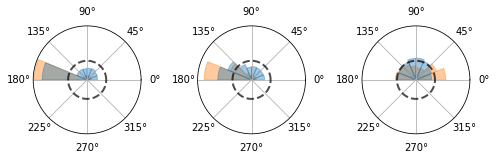

In [225]:
#visualise by area of bins
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)
for i,angles in zip(ax_lst,angle_lst_LR):
    circular_hist(axs[i], x=angles,color='C1',edgecolor='C1',**kwargs)
    
for i,angles in zip(ax_lst,angle_lst_FK):
    circular_hist(axs[i], x=angles,color='C0',edgecolor='C0',**kwargs)

for i in ax_lst:
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,4*y0])
    
#print bluf
print(f'these are creations for FK (blue) and LR (orange)')
print(f"considering angles at the times:")
print(string_FK)
print(string_LR)
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.tight_layout()
plt.show()

considering angles at times (-40.0, -4.0, -0.5) milliseconds (LR).
considering angles at times (-40.0, -4.0, -0.4) milliseconds (FK).
the number of events considered is 744. (FK)
the number of events considered is 3010. (LR)
these are annihilations for FK (blue) and LR (orange)
considering angles at the times:
considering angles at times (-40.0, -4.0, -0.4) milliseconds (FK).
considering angles at times (-40.0, -4.0, -0.5) milliseconds (LR).
the number of events considered is 744. (FK)
the number of events considered is 3010. (LR)


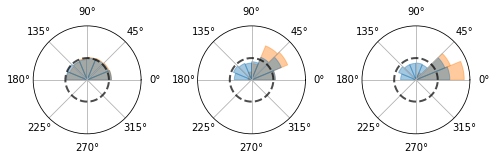

In [51]:
#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
df_lr=pd.read_csv(input_fn)


# #FK results for DT = 0.4 ms
# #annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
df_fk=pd.read_csv(input_fn)

# input_fn=search_for_file()

#TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

#slice df to a given tdeath
df=df_lr
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

#LR
tA=t_values[0]
tB=t_values[7]
tC=t_values[79]#15]#39]

string=f"considering angles at times {(-tC,-tB,-tA)} milliseconds (LR)."
print(string)
string_LR=string

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values

angle_lst=[anglesA,anglesB,anglesC]
angle_lst_FK=angle_lst

#slice df to a given tdeath
df=df_fk
t_values=sorted(set(df.tdeath.values))
# t_values=sorted(set(df.tbirth.values))

#FK
tA=t_values[0]#.4
tB=t_values[9]#4.
tC=t_values[99]#20.

string=f"considering angles at times {(-tC,-tB,-tA)} milliseconds (FK)."
print(string)
string_FK=string

anglesA=df[df.tdeath==tA].theta.values
anglesB=df[df.tdeath==tB].theta.values
anglesC=df[df.tdeath==tC].theta.values

# anglesA=df[df.tbirth==tA].theta.values
# anglesB=df[df.tbirth==tB].theta.values
# anglesC=df[df.tbirth==tC].theta.values

ax_lst=[2,1,0]
angle_lst=[anglesA,anglesB,anglesC]
angle_lst_LR=angle_lst

#angular histogram viewer from optical_flow
# the area of each bin is proportional to the number of observations in it,
bins=4*4
symmetrize=False
density=True

kwargs={
    'symmetrize':symmetrize,
    'density':density,
    'bins':bins,
    'alpha':0.4
}

x_values=np.linspace(0,2*np.pi,50)
if density:
    y0=1/(bins * np.pi)**0.5
else:
    y0=1/(bins)*angles.size

print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")

#visualise by area of bins
figsize=(7,4)
fig, axs = plt.subplots(ncols=3, subplot_kw=dict(projection='polar'),figsize=figsize)
for i,angles in zip(ax_lst,angle_lst_LR):
    circular_hist(axs[i], x=angles,color='C1',edgecolor='C1',**kwargs)
    
for i,angles in zip(ax_lst,angle_lst_FK):
    circular_hist(axs[i], x=angles,color='C0',edgecolor='C0',**kwargs)

for i in ax_lst:
    axs[i].plot(x_values,np.sqrt(2)*y0+0.*x_values,'k--',lw=2,alpha=0.7)
    axs[i].set_ylim([0,3.5*y0])
    
#print bluf
print(f'these are annihilations for FK (blue) and LR (orange)')
print(f"considering angles at the times:")
print(string_FK)
print(string_LR)
print(f"the number of events considered is {angle_lst_FK[0].shape[0]}. (FK)")
print(f"the number of events considered is {angle_lst_LR[0].shape[0]}. (LR)")
# print(f"considering angles at times (tC,tB,tA)={(tC,tB,tA)} milliseconds.")
plt.tight_layout()
plt.show()

# colored time plots for annihilation/creation events

## overlayed time plots for annihilation events

In [14]:
search_for_file(os.path.dirname(input_fn))

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_30_minRthresh_0.2_maxspeedthresh_0.5.csv


'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_30_minRthresh_0.2_maxspeedthresh_0.5.csv'

In [18]:
#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# df_lr=pd.read_csv(input_fn)

# #LR results for DT = 0.025 ms
#annihilations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# # #creations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'

df_lr=pd.read_csv(input_fn)
# #FK results for DT = 0.4 ms
# #annihilations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv"



# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_30_minRthresh_0.2_maxspeedthresh_0.5.csv'
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1_mean_radial_velocities_bins_30.csv'

# #creations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"
df_fk=pd.read_csv(input_fn)

In [16]:
# #LR results for DT = 0.5 ms
# # modelname='luo-rudy'
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"


# # #LR results for DT = 0.025 ms
# #annihilations aggregated
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # # #creations aggregated
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'
# df_lr=pd.read_csv(input_fn)

# # #FK results for
# # #annihilations aggregated
# #DT = 0.4 ms
# # input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# #DT=0.025 ms
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# df_fk=pd.read_csv(input_fn)

# # input_fn=search_for_file()
# #TODO: make outputs simultaneously visible for LR and FK results (dt=0.5,0.4, respectively)

In [19]:
df_fk['tdeath']

0          977.2
1          976.8
2          976.4
3          976.0
4          975.6
           ...  
2022504      2.0
2022505      1.6
2022506      1.2
2022507      0.8
2022508      0.4
Name: tdeath, Length: 2022509, dtype: float64

In [20]:
df_fk.sort_values('tdeath',ascending=True,inplace=True)
df_lr.sort_values('tdeath',ascending=True,inplace=True)

In [21]:
# print(f"number of trials is {len(sorted(set(df_lr.pid.values)))} (LR) and {len(sorted(set(df_fk.pid.values)))} (FK).")

#compute xy values
x_label='time (ms)'#'t'
# x_label='time after annihilation (ms)'#'t'
y_label='inward/outward\nangle (radians)'#'$\vartheta$'
# 'r (cm)'
# 'dr/dt (cm/ms)'

df_phases=df_lr.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
x_values_lr=dfm.index.values
y_values_lr=dfm.theta.values
yerr_values_lr=dfs.theta.values

df_phases=df_fk.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
x_values_fk=dfm.index.values
y_values_fk=dfm.theta.values
yerr_values_fk=dfs.theta.values

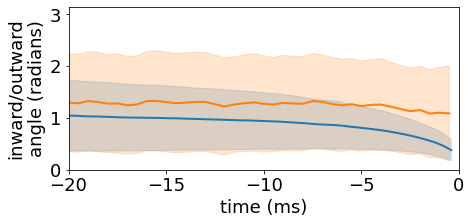

In [22]:
fontsize=18
fig,ax=plt.subplots(ncols=1,figsize=(7,3))#(5,4))
# axes=[1e-1,2,1e-3,0.2]
alpha=0.2
# FK
ax.fill_between(-x_values_fk, y_values_fk-yerr_values_fk, y_values_fk+yerr_values_fk,color='C0',alpha=alpha)
ax.plot(-x_values_fk,y_values_fk,'C0',lw=2)
#LR
ax.fill_between(-x_values_lr, y_values_lr-yerr_values_lr, y_values_lr+yerr_values_lr,color='C1',alpha=alpha)
ax.plot(-x_values_lr,y_values_lr,'C1',lw=2)

#TODO: add cuts for times



ax.set_xlim([-20,0])#-DT])
# ax.set_xlim([-50,-DT])
ax.set_ylim([0,np.pi])
ax.set_xlabel(x_label,fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

#wrong bluf because aggregate
# print(f"number of trials is {len(sorted(set(df_lr.pid.values)))} (LR) and {len(sorted(set(df_fk.pid.values)))} (FK).")
plt.show()

In [23]:
#plot the mean drdt versus r
#compute xy values
x_label='R (cm)'
y_label='dR/dt (cm/ms)'

df_fk.sort_values('tdeath',ascending=True,inplace=True)
df_lr.sort_values('tdeath',ascending=True,inplace=True)

df_phases=df_lr.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
t_values=dfm.index.values
range_values=dfm.r.values
drdt_values=np.diff(range_values)/DT
r_values=range_values[1:]/2+range_values[:-1]/2
x_values_lr=r_values.copy()
y_values_lr=drdt_values.copy()
# yerr_values_lr=dfs.theta.values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
rmax=1.2 #cm
boo=r_values<rmax
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

dict_force_fit_lr=dict_force_fit
y_hat_values_lr=y_hat_values.copy()

df_phases=df_fk.copy()
t_values=sorted(set(df_phases.tdeath.values))
DT=sorted(set(df_phases.tdeath.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
# dfm=df_phases.groupby('tbirth').mean()
# dfs=df_phases.groupby('tbirth').std()
dfm=df_phases.groupby('tdeath').mean()
dfs=df_phases.groupby('tdeath').std()
t_values=dfm.index.values
range_values=dfm.r.values
drdt_values=np.diff(range_values)/DT
r_values=range_values[1:]/2+range_values[:-1]/2
x_values_fk=r_values.copy()
y_values_fk=drdt_values.copy()
# yerr_values_fk=dfs.theta.values

#fit drdt_values to F0+F1/r with OLS fit for FK model where 1/r is greater than 2 1/cm
rmax=0.5 #cm
boo=r_values<rmax
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values
dict_force_fit_fk=dict_force_fit
y_hat_values_fk=y_hat_values.copy()

In [24]:
print(f"the best fits are\n {dict_force_fit_lr} (LR) and \n{dict_force_fit_fk} (FK).")

the best fits are
 {'m': -0.04422231513736985, 'Delta_m': 0.05564659598723807, 'b': 0.03844264448673002, 'Delta_b': 0.05347057224331182, 'Rsquared': 0.012351468067116686} (LR) and 
{'m': 0.03728256788539025, 'Delta_m': 0.0006336154335623547, 'b': -0.04866949942755054, 'Delta_b': 0.0017941748876406575, 'Rsquared': 0.9990235572199276} (FK).


In [32]:
# def print_dict(input_dict):
#     for key in input_dict.keys():
#         print(f"{key}={input_dict[key]}")
r_values

array([0.21120453, 0.25593874, 0.29152921, ..., 1.83470333, 1.83077765,
       1.82552717])

In [30]:
a_fk=dict_force_fit_fk['m']/2*1000
print(f'the apparent attraction coefficient for the fenton-karma model is a={a_fk:.4f} cm^2/s.')

the apparent attraction coefficient for the fenton-karma model is a=18.6413 cm^2/s.


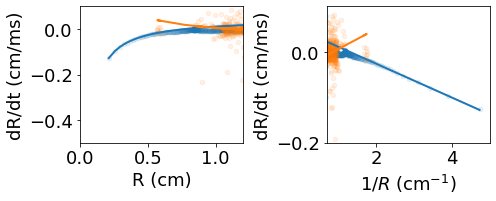

In [25]:
fontsize=18
alpha=0.1

fig,axs=plt.subplots(ncols=2,figsize=(7,3))#(5,4))
ax=axs[0]
ax.scatter(x_values_fk,-y_values_fk,c='C0',s=20,alpha=alpha)
ax.scatter(x_values_lr,-y_values_lr,c='C1',s=20,alpha=alpha)

#plot fits
ax.plot(x_values_fk,-y_hat_values_fk,c='C0',lw=2,alpha=1)
ax.plot(x_values_lr,-y_hat_values_lr,c='C1',lw=2,alpha=1)

ax.set_xlim([0,1.2])
ax.set_ylim([-0.5,.1])
ax.set_xlabel(x_label,fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

ax=axs[1]
ax.scatter(1/x_values_fk,-y_values_fk,c='C0',s=20,alpha=alpha)
ax.scatter(1/x_values_lr,-y_values_lr,c='C1',s=20,alpha=alpha)

#plot fits
ax.plot(1/x_values_fk,-y_hat_values_fk,c='C0',lw=2,alpha=1)
ax.plot(1/x_values_lr,-y_hat_values_lr,c='C1',lw=2,alpha=1)

# y_hat_values_fk
# y_hat_values_fk

ax.set_xlim([.7,5])
ax.set_ylim([-0.2,.1])
ax.set_xlabel(r'$1/R$ (cm$^{-1}$)',fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)

# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
#wrong bluf because aggregate
plt.tight_layout()
plt.show()

$$
F(R)\propto\frac{dR}{dt} = b + \frac{m}{R}
$$

In [85]:
#TODO: try any more annihilation plots... 
# HINT: any from the following 3 panel
# HINT: are phi values present/convenient? Yes.
#TODO: condense the figures we like into functions. test on FK model
#TODO: make comparable functions for LR model. 

In [86]:
print(f"the ols fit for FK:")
print_dict(dict_force_fit_fk)
print(f"\nthe ols fit for LR:")
print_dict(dict_force_fit_lr)

the ols fit for FK:
m=0.04461102868197167
Delta_m=0.0007137987417719204
b=-0.015750973661691092
Delta_b=0.002964762394886217
Rsquared=0.9916728971822155

the ols fit for LR:
m=-0.04422231513736983
Delta_m=0.05564659598723807
b=0.03844264448673
Delta_b=0.05347057224331182
Rsquared=0.012351468067116686


In [87]:
nobs=df_fk.groupby('tdeath').r.count().iloc[0]
print(f"nobs={nobs} (FK)")
nobs=df_lr.groupby('tdeath').r.count().iloc[0]
print(f"nobs={nobs} (LR)")

nobs=289 (FK)
nobs=744 (LR)


## overlayed time plots for creation events

In [44]:
#LR results for DT = 0.5 ms
# modelname='luo-rudy'
#annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilations_minr_1.0_mindur_20.0.csv"
# df_lr=pd.read_csv(input_fn)

# #LR results for DT = 0.025 ms
#annihilations aggregated
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_minr_1.0_mindur_20.0.csv'
# # #creations aggregated
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/creations_minr_1.0_mindur_20.0.csv'

df_lr=pd.read_csv(input_fn)
# #FK results for DT = 0.4 ms
# #annihilations aggregated
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilations_minr_1.0_mindur_20.0.csv"
# #creations aggregated
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/creations_minr_1.0_mindur_20.0.csv"
df_fk=pd.read_csv(input_fn)

In [45]:
df_fk.sort_values('tbirth',ascending=True,inplace=True)
df_lr.sort_values('tbirth',ascending=True,inplace=True)

In [46]:
# print(f"number of trials is {len(sorted(set(df_lr.pid.values)))} (LR) and {len(sorted(set(df_fk.pid.values)))} (FK).")

#compute xy values
x_label='time (ms)'#'t'
# x_label='time after annihilation (ms)'#'t'
y_label='inward/outward\nangle (radians)'#'$\vartheta$'
# 'r (cm)'
# 'dr/dt (cm/ms)'

df_phases=df_lr.copy()
t_values=sorted(set(df_phases.tbirth.values))
DT=sorted(set(df_phases.tbirth.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_phases.groupby('tbirth').mean()
dfs=df_phases.groupby('tbirth').std()
# dfm=df_phases.groupby('tdeath').mean()
# dfs=df_phases.groupby('tdeath').std()
x_values_lr=dfm.index.values
y_values_lr=dfm.theta.values
yerr_values_lr=dfs.theta.values

df_phases=df_fk.copy()
t_values=sorted(set(df_phases.tbirth.values))
DT=sorted(set(df_phases.tbirth.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_phases.groupby('tbirth').mean()
dfs=df_phases.groupby('tbirth').std()
# dfm=df_phases.groupby('tdeath').mean()
# dfs=df_phases.groupby('tdeath').std()
x_values_fk=dfm.index.values
y_values_fk=dfm.theta.values
yerr_values_fk=dfs.theta.values

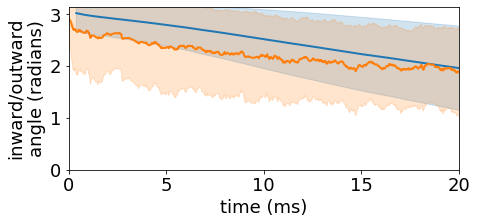

In [47]:
fontsize=18
fig,ax=plt.subplots(ncols=1,figsize=(7,3))#(5,4))
# axes=[1e-1,2,1e-3,0.2]
alpha=0.2
# FK
ax.fill_between(x_values_fk, y_values_fk-yerr_values_fk, y_values_fk+yerr_values_fk,color='C0',alpha=alpha)
ax.plot(x_values_fk,y_values_fk,'C0',lw=2)
#LR
ax.fill_between(x_values_lr, y_values_lr-yerr_values_lr, y_values_lr+yerr_values_lr,color='C1',alpha=alpha)
ax.plot(x_values_lr,y_values_lr,'C1',lw=2)

#TODO: add cuts for times



ax.set_xlim([0,20])#-DT])
# ax.set_xlim([-50,-DT])
ax.set_ylim([0,np.pi])
ax.set_xlabel(x_label,fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

#wrong bluf because aggregate
# print(f"number of trials is {len(sorted(set(df_lr.pid.values)))} (LR) and {len(sorted(set(df_fk.pid.values)))} (FK).")
plt.show()

In [57]:
#plot the mean drdt versus r
#compute xy values
x_label='R (cm)'
y_label='dR/dt (cm/ms)'

df_fk.sort_values('tbirth',ascending=True,inplace=True)
df_lr.sort_values('tbirth',ascending=True,inplace=True)

df_phases=df_lr.copy()
t_values=sorted(set(df_phases.tbirth.values))
DT=sorted(set(df_phases.tbirth.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_phases.groupby('tbirth').mean()
dfs=df_phases.groupby('tbirth').std()
# dfm=df_phases.groupby('tdeath').mean()
# dfs=df_phases.groupby('tdeath').std()
t_values=dfm.index.values
range_values=dfm.r.values
drdt_values=np.diff(range_values)/DT
r_values=range_values[1:]/2+range_values[:-1]/2
x_values_lr=r_values
y_values_lr=drdt_values
# yerr_values_lr=dfs.theta.values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
rmax=.8 #cm
boo=r_values<rmax
x=1/r_values[boo]**2
y=drdt_values[boo]

boo=y<0.4
x_lr=x[boo]
y_lr=y[boo]

dict_force_fit=compute_95CI_ols(x_lr,y_lr)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values**2

x_lr=x.copy()
y_lr=y.copy()

dict_force_fit_lr=dict_force_fit
y_hat_values_lr=y_hat_values

df_phases=df_fk.copy()
t_values=sorted(set(df_phases.tbirth.values))
DT=sorted(set(df_phases.tbirth.values))[0]
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_phases.groupby('tbirth').mean()
dfs=df_phases.groupby('tbirth').std()
# dfm=df_phases.groupby('tdeath').mean()
# dfs=df_phases.groupby('tdeath').std()
t_values=dfm.index.values
range_values=dfm.r.values
drdt_values=np.diff(range_values)/DT
r_values=range_values[1:]/2+range_values[:-1]/2
x_values_fk=r_values
y_values_fk=drdt_values
# yerr_values_fk=dfs.theta.values

#fit drdt_values to F0+F1/r with OLS fit for FK model where 1/r is greater than 2 1/cm
rmax=.8#0.5 #cm
boo=r_values<rmax
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values
dict_force_fit_fk=dict_force_fit
y_hat_values_fk=y_hat_values

print(f"the best fits are\n {dict_force_fit_lr} (LR) and \n{dict_force_fit_fk} (FK).")

the best fits are
 {'m': 0.03907907411208567, 'Delta_m': 0.0013708774900725372, 'b': -0.016316728922834894, 'Delta_b': 0.003617423757765058, 'Rsquared': 0.9550463808209577} (LR) and 
{'m': 0.04284740300370245, 'Delta_m': 0.00041365115170128566, 'b': -0.026916537026504088, 'Delta_b': 0.0007914393345501754, 'Rsquared': 0.9994178343464847} (FK).


In [58]:
def print_dict(input_dict):
    for key in input_dict.keys():
        print(f"{key}={input_dict[key]}")

In [59]:
# #TODO: use better binning/averaging?  There are weird values popping up on the y axis...
# boo=y_lr<0.4
# plt.plot(x_lr[boo],y_lr[boo])
# plt.xscale('log')
# plt.yscale('log')
# print(compute_95CI_ols(np.log(x_lr[boo]),np.log(y_lr[boo])))
# plt.show()
# {'m': 1.1150177782249635, 'Delta_m': 0.0352362804512445, 'b': -3.5472307622899737, 'Delta_b': 0.03130914035225103, 'Rsquared': 0.9632068040661317}

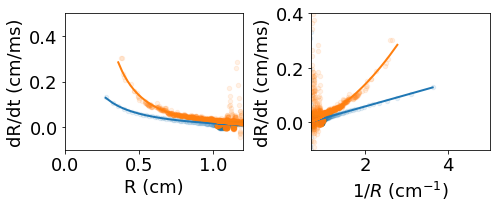

In [60]:
fontsize=18
alpha=0.1

fig,axs=plt.subplots(ncols=2,figsize=(7,3))#(5,4))
ax=axs[0]
ax.scatter(x_values_fk,y_values_fk,c='C0',s=20,alpha=alpha)
ax.scatter(x_values_lr,y_values_lr,c='C1',s=20,alpha=alpha)

#plot fits
ax.plot(x_values_fk,y_hat_values_fk,c='C0',lw=2,alpha=1)
ax.plot(x_values_lr,y_hat_values_lr,c='C1',lw=2,alpha=1)

ax.set_xlim([0,1.2])
ax.set_ylim([-0.1,.5])
ax.set_xlabel(x_label,fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)
# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

ax=axs[1]
ax.scatter(1/x_values_fk,y_values_fk,c='C0',s=20,alpha=alpha)
ax.scatter(1/x_values_lr,y_values_lr,c='C1',s=20,alpha=alpha)

#plot fits
ax.plot(1/x_values_fk,y_hat_values_fk,c='C0',lw=2,alpha=1)
ax.plot(1/x_values_lr,y_hat_values_lr,c='C1',lw=2,alpha=1)

# y_hat_values_fk
# y_hat_values_fk

ax.set_xlim([.7,5])
ax.set_ylim([-0.1,.4])
ax.set_xlabel(r'$1/R$ (cm$^{-1}$)',fontsize=fontsize)
ax.set_ylabel(y_label,fontsize=fontsize)

# ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
#wrong bluf because aggregate
plt.tight_layout()
plt.show()

For creation events from the LR model,
$$
F(R
)\propto\frac{dR}{dt} = b + \frac{m}{R}
$$


In [54]:
#TODO: try any more annihilation plots... 
# HINT: any from the following 3 panel
# HINT: are phi values present/convenient? Yes.
#TODO: condense the figures we like into functions. test on FK model
#TODO: make comparable functions for LR model. 
print(f"the ols fit for FK:")
print_dict(dict_force_fit_fk)
print(f"\nthe ols fit for LR:")
print_dict(dict_force_fit_lr)

the ols fit for FK:
m=0.04284740300370191
Delta_m=0.0004136511517009633
b=-0.026916537026502783
Delta_b=0.0007914393345495595
Rsquared=0.9994178343464857

the ols fit for LR:
m=0.03907907411208553
Delta_m=0.0013708774900724602
b=-0.016316728922834575
Delta_b=0.003617423757764854
Rsquared=0.9550463808209622


In [56]:
nobs=df_fk.groupby('tbirth').r.count().iloc[0]
print(f"nobs={nobs} (FK)")
nobs=df_lr.groupby('tbirth').r.count().iloc[0]
print(f"nobs={nobs} (LR)")

nobs=7866 (FK)
nobs=114 (LR)


# TODO: make overlayed plots for phase angle values

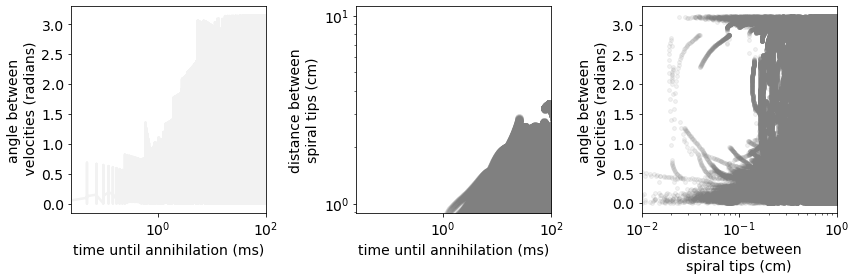

In [183]:
saving=False
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"lr-annihilations.png"
fontsize=14
tmax=1e2
alpha=.1
fig,axs=plt.subplots(ncols=3,figsize=(12,4))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

#extract local particle values
# pid_lst=list(set(df_phases.pid.values))
# for pid in pid_lst:#[:10]:
#     boo=df_phases.pid==pid
t_values=df_phases.tdeath.values
range_values=df_phases.r.values
theta_values=df_phases.theta.values

x_values=t_values
y_values=theta_values
ax=axs[0]
ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xlim([DT,tmax])
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

#plot range versus time until death
x_values=t_values
y_values=range_values
ax=axs[1]
ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('distance between\nspiral tips (cm)',fontsize=fontsize)
ax.set_xlim([DT,tmax])
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)

# plot angle between versus range (left)
x_values=range_values
y_values=theta_values
ax=axs[2]
ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',s=15)
ax.set_xlabel('distance between\nspiral tips (cm)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xlim([1e-2,1])
ax.set_xscale('log')
#     ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)   


    
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")


plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

AttributeError: 'DataFrame' object has no attribute 'tdeath'

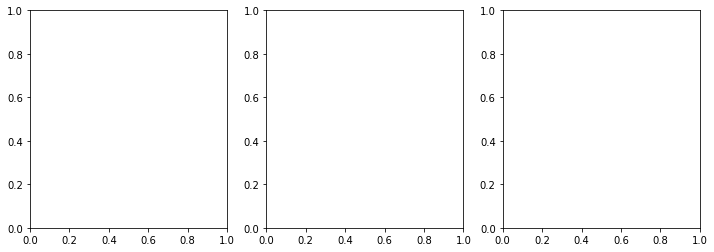

In [56]:
saving=False
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"lr-annihilations.png"
fontsize=14
tmax=1e2
alpha=.1
fig,axs=plt.subplots(ncols=3,figsize=(12,4))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

#extract local particle values
pid_lst=list(set(df_phases.pid.values))
for pid in pid_lst:#[:10]:
    boo=df_phases.pid==pid
    t_values=df_phases[boo].tdeath.values
    range_values=df_phases[boo].r.values
    theta_values=df_phases[boo].theta.values
    
    x_values=t_values
    y_values=theta_values
    ax=axs[0]
    ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
    ax.set_xlim([DT,tmax])
    ax.set_xscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)

    #plot range versus time until death
    x_values=t_values
    y_values=range_values
    ax=axs[1]
    ax.plot(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',lw=2.5)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('distance between\nspiral tips (cm)',fontsize=fontsize)
    ax.set_xlim([DT,tmax])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)

    # plot angle between versus range (left)
    x_values=range_values
    y_values=theta_values
    ax=axs[2]
    ax.scatter(x_values,y_values,alpha=alpha,label='_Hidden',c='gray',s=15)
    ax.set_xlabel('distance between\nspiral tips (cm)',fontsize=fontsize)
    ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
    ax.set_xlim([1e-2,1])
    ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)   
    

    
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")


plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
# tA=DT # 0.4 #ms
# tB=2   #ms
# tC=20  #ms
# #iterate over all annihilation events computing/plotting the shortest trajectory if it is long enough and if it gets further than a certain range
# df_deaths=df_phases
# saving=False
# savefig_folder=f"{nb_dir}/Figures"
# savefig_fn=f"angles-between-deaths-b-lr.png"
# # savefig_fn=f"angles-between-deaths-b.png"
# fontsize=16
# bins=6
# tmax=1e2
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))

# # y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# # y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\vartheta$']
# ax_lst=[1]
# c_lst=['gray']
# # angle_threshold=2.3
# val1_lst=[];val2_lst=[];val3_lst=[]
# #extract local particle values
# pid_lst=list(set(df_deaths.pid.values))
# for pid in pid_lst:#[:10]:
#     boo=df_deaths.pid==pid
#     y_values_lst=[df_deaths[boo].theta.values]
#     x_values=df_deaths[boo]['tdeath'].values
#     for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#         ax=axs[nax]
#         ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)

#         boo1=np.isclose(x_values,tA)
#         boo2=np.isclose(x_values,tB)
#         boo3=np.isclose(x_values,tC)
#         val1=y_values[boo1]
#         val2=y_values[boo2]
#         val3=y_values[boo3]
#         if val1.shape[0]>0:
#             val1_lst.append(val1[0])
#             val2_lst.append(val2[0])
#             val3_lst.append(val3[0])
            
# ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
# ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
# ax.set_xlim([DT,tmax])
# ax.set_xscale('log')
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.tick_params(axis='both', which='minor', labelsize=1)
                
# # fontsize=16
# # fig,ax=plt.subplots(ncols=1,figsize=(5,5))
# ax=axs[0]
# # ax.hist(val1_lst,bins=bins,density=True,color='C0',label=f't=-{tA:.1f} ms',alpha=0.7)
# ax.hist(val2_lst,bins=bins,density=True,color='C1',label=f't=-{tB:.1f} ms',alpha=0.7)
# ax.hist(val3_lst,bins=bins,density=True,color='C2',label=f't=-{tC:.1f} ms',alpha=0.7)
# ax.legend(fontsize=fontsize)
# #plot control
# xv=np.arange(0,np.pi,0.1)
# ax.plot(xv,xv*0.+1/np.pi,'k--')#,color='gray',)
# ax.set_xlabel('angle between\n velocities (radians)',fontsize=fontsize)
# ax.set_ylabel(r'prob. density',fontsize=fontsize)
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.tick_params(axis='both', which='minor', labelsize=1)
            
# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving:
#     plt.show()
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")

#     #     plt.close()

In [ ]:
# fontsize=16
# saving=False
# savefig_folder=f"{nb_dir}/Figures"
# savefig_fn=f"fine-death-range-phase.png"
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# # y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# # y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

# #extract local particle values
# pid_lst=list(set(df_phases.pid.values))
# for pid in pid_lst[:10]:
#     boo=df_phases.pid==pid
#     y_values_lst=[df_phases[boo].phi1.values,df_phases[boo].phi2.values,df_phases[boo].phi_sum.values, df_phases[boo].phi_diff.values]
#     x_values=df_phases[boo].tdeath.values
#     for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#         ax=axs[nax]
#         ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)
#         # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
#         ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#         ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

#         ax.set_xlim([DT,1e1])
#     #     ax.set_ylim([-np.pi/8,np.pi/8])
#         #     ax.set_xlim([1e-3,1e2])
#         ax.set_xscale('log')
#         # plt.yscale('log')
#         ax.tick_params(axis='both', which='major', labelsize=fontsize)
#         ax.tick_params(axis='both', which='minor', labelsize=1)
#     #     ax.legend(fontsize=fontsize)
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving: 
#     plt.show() 
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()

In [ ]:
# fontsize=16
# saving=False
# savefig_folder=f"{nb_dir}/Figures/fine_death"
# savefig_fn=f"fine-death-range-phase.png"
# #plot naive range at death and birth
# fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
# y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
# ax_lst=[0,0,1,1]
# c_lst=['C0','C1','C0','C1']

# for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#     ax=axs[nax]
#     ax.plot(x_values,y_values,alpha=1.0,label=y_label,c=color,lw=2.5)
#     # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
#     ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#     ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

#     ax.set_xlim([DT,1e1])
# #     ax.set_ylim([-np.pi/8,np.pi/8])
#     #     ax.set_xlim([1e-3,1e2])
#     ax.set_xscale('log')
#     # plt.yscale('log')
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=1)
#     ax.legend(fontsize=fontsize)

# plt.tight_layout()
# # plt.show()
# # print(f"\ttime between two frames was {0.001} ms")
# plt.tight_layout()
# if not saving: 
#     plt.show() 
# else:
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()

__schema__
- t_until_death: time until death (index)
- range_values: distance from tip to other tip
- angle_values: angle between the velocity of one tip with the ray starting at the center of mass and extending out to the tip
- 

__TODO(later):__ convert this markdown cell into something that documents how angle_values were computed
$$
\text{Let   } \phi_1\equiv\cos^{-1}\big(\widehat{\mathbf{x}_2-\mathbf{x}_1}\;\cdot\;\hat{\mathbf{a}}_1\big),
$$

$$
\text{and let   } \phi_2\equiv\cos^{-1}\big(\widehat{\mathbf{x}_1-\mathbf{x}_2}\;\cdot\;\hat{\mathbf{a}}_2\big).
$$

denote the (unsigned) phases of particle 1 & 2, where $\mathbf{a}_1$ and $\mathbf{a}_2$ are perpendicular to $\nabla V\equiv$ (grad_ux,grad_uy).

In [ ]:
from lib.routines.dag_log_to_msd import *

In [ ]:
#generate trajectories, unwrapped trajectories, and mean squared displacements for folder of tip logs
ds=5
width=200
kwargs={
    'L':width,
    'DS':ds/width,
    'use_cache':True,
    'sr':3*width,
    'mem':0}

# input_fn=search_for_file();
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/Log/ic002.23_log.csv"
print(input_fn)
output_file_name=run_routine_log_to_unwrapped_trajectory(input_fn,**kwargs)

In [ ]:
# compute_angle_between_final_velocities
# get_compute_ranges_between
beep(6)

In [ ]:
#TODO: load existing spiral tip trajectory data
#TODO: compute_interactions
#TODO: compute_ranges_between 
#TODO: visually test compute_angle_between_final_velocities

#TODO: compute the angle between all tip annihilations.  save as csv
#TODO: remove any events with tips that did not last longer than min_duration
#TODO: remove any events with tips never had a range greater than min_range

#TODO: find matplotlib/preexisting example of angular histogram


In [ ]:
#Token fk model
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-300x300/ds_7.5_param_set_8/Log/ic300x300.0.6_traj_sr_600_mem_0.csv"
#Token lr model
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-lr-300x300/param_qu_tmax_30/trajectories/ic300x300.3.3_traj_sr_600_mem_0.csv"
ds=5
width=200
height=width
DS=ds/width

# input_fn=search_for_file()
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
df=pd.read_csv(input_fn)
print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")



In [ ]:
df.head()

In [ ]:
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
df_phases=compute_annihilation_events(input_fn,width,height,ds);#,**kwargs)
df_phases.head()

In [ ]:
#DONE: visually verify that the output makes sense
#DONE: wrap all ^this into a function
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
save_fn=save_annihilation_events(input_fn,width,height,ds,save_folder=None,save_fn=None,printing=False)#,**kwargs)
print(save_fn)

In [ ]:
# #DONE: move ^this to lib
# #DONE: make routine and daskbag call to ^this for input_fn_lst
# kwargs={
#     width,height,ds,save_folder=None,save_fn=None
# }

In [ ]:
#compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_phases.groupby('tdeath').mean()
x_values=dfm.index.values
# y_values=dfm.phi_diff.values
y_values=dfm.theta.values
plt.plot(x_values,y_values)
plt.xlim([0,20])

In [ ]:
fontsize=16
#TODO: plot range versus time until death (right)
#TODO: plot angle between versus range (left)
tmax=1e2
fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
ax_lst=[0,0,1,1]
c_lst=['C0','C1','C0','C1']

#extract local particle values
pid_lst=list(set(df_phases.pid.values))
for pid in pid_lst[:10]:
    boo=df_phases.pid==pid
    range_values=df_phases[boo].r.values
    tdeath_values=df_phases[boo].tdeath.values
    theta_values=df_phases[boo].theta.values
    
    x_values=range_values
    y_values=theta_values
    ax=axs[0]
    ax.scatter(x_values,y_values,alpha=.3,label='_Hidden',c='gray',s=15)
    ax.set_xlabel('distance between\nspiral tips (cm)',fontsize=fontsize)
    ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
    ax.set_xlim([1e-2,1])
    ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)   
    
    x_values=tdeath_values
    y_values=range_values
    ax=axs[1]
    ax.plot(x_values,range_values,alpha=.3,label='_Hidden',c='gray',lw=2.5)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('distance between\nspiral tips (cm)',fontsize=fontsize)
    ax.set_xlim([DT,tmax])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)
    

    
# axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
# axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"angles-between-deaths-a-lr.png"
# savefig_fn=f"angles-between-deaths-a.png"
plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
tA=DT # 0.4 #ms
tB=2   #ms
tC=20  #ms
#iterate over all annihilation events computing/plotting the shortest trajectory if it is long enough and if it gets further than a certain range
df_deaths=df_phases
saving=True
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"angles-between-deaths-b-lr.png"
# savefig_fn=f"angles-between-deaths-b.png"
fontsize=16
bins=6
tmax=1e2
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,5))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\vartheta$']
ax_lst=[1]
c_lst=['gray']
# angle_threshold=2.3
val1_lst=[];val2_lst=[];val3_lst=[]
#extract local particle values
pid_lst=list(set(df_deaths.pid.values))
for pid in pid_lst:#[:10]:
    boo=df_deaths.pid==pid
    y_values_lst=[df_deaths[boo].theta.values]
    x_values=df_deaths[boo]['tdeath'].values
    for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
        ax=axs[nax]
        ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)

        boo1=np.isclose(x_values,tA)
        boo2=np.isclose(x_values,tB)
        boo3=np.isclose(x_values,tC)
        val1=y_values[boo1]
        val2=y_values[boo2]
        val3=y_values[boo3]
        if val1.shape[0]>0:
            val1_lst.append(val1[0])
            val2_lst.append(val2[0])
            val3_lst.append(val3[0])
            
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
ax.set_ylabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_xlim([DT,tmax])
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
                
# fontsize=16
# fig,ax=plt.subplots(ncols=1,figsize=(5,5))
ax=axs[0]
# ax.hist(val1_lst,bins=bins,density=True,color='C0',label=f't=-{tA:.1f} ms',alpha=0.7)
ax.hist(val2_lst,bins=bins,density=True,color='C1',label=f't=-{tB:.1f} ms',alpha=0.7)
ax.hist(val3_lst,bins=bins,density=True,color='C2',label=f't=-{tC:.1f} ms',alpha=0.7)
ax.legend(fontsize=fontsize)
#plot control
xv=np.arange(0,np.pi,0.1)
ax.plot(xv,xv*0.+1/np.pi,'k--')#,color='gray',)
ax.set_xlabel('angle between\n velocities (radians)',fontsize=fontsize)
ax.set_ylabel(r'prob. density',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
            
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")
plt.tight_layout()
if not saving:
    plt.show()
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")

    #     plt.close()

In [ ]:
fontsize=16
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
ax_lst=[0,0,1,1]
c_lst=['C0','C1','C0','C1']

for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
    ax=axs[nax]
    ax.plot(x_values,y_values,alpha=1.0,label=y_label,c=color,lw=2.5)
    # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

    ax.set_xlim([DT,1e1])
#     ax.set_ylim([-np.pi/8,np.pi/8])
    #     ax.set_xlim([1e-3,1e2])
    ax.set_xscale('log')
    # plt.yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)
    ax.legend(fontsize=fontsize)

plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")

saving=False
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-range-phase.png"
plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
fontsize=16
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
ax_lst=[0,0,1,1]
c_lst=['C0','C1','C0','C1']

#extract local particle values
pid_lst=list(set(df_phases.pid.values))
for pid in pid_lst[:10]:
    boo=df_phases.pid==pid
    y_values_lst=[df_phases[boo].phi1.values,df_phases[boo].phi2.values,df_phases[boo].phi_sum.values, df_phases[boo].phi_diff.values]
    x_values=df_phases[boo].tdeath.values
    for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
        ax=axs[nax]
        ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)
        # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
        ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
        ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

        ax.set_xlim([DT,1e1])
    #     ax.set_ylim([-np.pi/8,np.pi/8])
        #     ax.set_xlim([1e-3,1e2])
        ax.set_xscale('log')
        # plt.yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=1)
    #     ax.legend(fontsize=fontsize)
axs[0].set_title('phi_1 and phi_2 \n',fontsize=fontsize)
axs[1].set_title('phi_sum and phi_diff \n',fontsize=fontsize)
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")

saving=False
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"fine-death-range-phase.png"
plt.tight_layout()
if not saving: 
    plt.show() 
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
# #compute measures near annihilation
# #input: df_ordered_interactions
# min_duration=75 #ms
# min_range=1. #cm
# dsdpixel=ds/width #cm per pixel
# use_min_duration=False
# use_grad_voltage=True

# pid_queue=list(df_ordered_interactions.pid.values)
# pid_deathmate_dict=dict(zip(pid_queue,list(df_ordered_interactions.pid_deathmate.values)))
# df_out_lst=[]
# while len(pid_queue)>0:
#     pid=pid_queue.pop(0)
#     pid_deathmate=pid_deathmate_dict[pid]
#     try:
#         pid_queue.remove(pid_deathmate)
#         #extract d1,d2
#         d1=df[df.particle==pid].copy()
#         d2=df[df.particle==pid_deathmate].copy()
#         d1.index=d1.frame
#         d2.index=d2.frame
#         #compute ranges between
#         range_values=compute_ranges_between(d1,d2)*dsdpixel
#         length=t_to_death_values.shape[0]
#         #compute x,y values
#         if use_grad_voltage:
#             t_to_death_values, phi1_values, phi2_values, phi_sum_values, phi_diff_values=compute_phase_angles_from_grad_voltage(d1,d2)
            
#         else:
#             t_vals=d1['t'].values[:-length]
#             t_to_death_values=np.max(t_vals)-t_vals
        
#         nobs=np.abs(phi1_values)[1:-1].shape[0]
#         if nobs>1:
#             #compute range_values
#             range_values=compute_ranges_between(d1,d2)*dsdpixel
#             #compute angle between velocities
#             tdeath_values,angle_between_values=compute_angle_between_final_velocities(d1,d2)
#             theta_values=angle_between_values
#             #heretim
#             #align range_values and theta_values
#             boo=~np.isnan(theta_values)
#             theta_values=theta_values[boo]        
#             assert(range_values.shape[0]==t_to_death_values.shape[0])
#             if use_min_duration:
#                 #filter by min_duration
#                 t_values=t_to_death_values[1:-1]
#                 boo_keep = min_duration<=np.max(t_values)-np.min(t_values)
#                 #filter by min_range
#                 boo_keep &=min_range<=np.max(range_values)
#             else:
#                 boo_keep =min_range<=np.max(range_values)
                
#             if boo_keep:
#                 if use_grad_voltage:
#                     df_out=pd.DataFrame({
#                         'pid':pid+0*t_values.astype('int'),
#                         'pid_deathmate':pid_deathmate+0*t_values.astype('int'),
#                         'tdeath':t_values,
#                         'phi1':np.abs(phi1_values)[1:-1],
#                         'phi2':np.abs(phi2_values)[1:-1],
#                         'phi_sum':np.abs(phi_sum_values)[1:-1],
#                         'phi_diff':np.abs(phi_diff_values)[1:-1],
#                         'r':range_values[1:-1],
#                         'theta':theta_values,
#                     })
#                 else:
#                     df_out=pd.DataFrame({
#                         'pid':pid+0*t_values.astype('int'),
#                         'pid_deathmate':pid_deathmate+0*t_values.astype('int'),
#                         'tdeath':t_values,
#                         'r':range_values[1:-1],
#                         'theta':theta_values,
#                     })

#                 #append x,y values to list
#                 df_out_lst.append(df_out)
#     except ValueError as e: #for catching ValueError: list.remove(x): x not in list
#         pass

__Result__
- When the distance between tips is ~0.4cm in the Fenton-Karma model, the undirected force is comparable to the inward directed force that is responsible for annihilation.
- 

# visualize angle between final velocities

In [ ]:
pid_lst=df_ordered_interactions.pid.values
pid_mate_lst=df_ordered_interactions.pid_deathmate.values
# pid_mate_lst=df_ordered_interactions.pid_birthmate.values
pid_mate_dict=dict(zip(pid_lst,pid_mate_lst))

In [ ]:
pid=pid_lst[0]
pid_mate=pid_mate_dict[pid]

In [ ]:
#extract d1,d2
d1=df[df.particle==pid].copy()
d2=df[df.particle==pid_mate].copy()
d1.index=d1.frame
d2.index=d2.frame

tdeath_values,angle_between_values=compute_angle_between_final_velocities(d1,d2)


df_out=pd.DataFrame({
    'tdeath':tdeath_values,
    'theta':angle_between_values,
    'pid':pid})

In [ ]:
#compute ranges between
compute_ranges_between=get_compute_ranges_between(width=width,height=height)
tdeath_values,angle_between_values=compute_angle_between_final_velocities(d1,d2)
range_values=compute_ranges_between(d1,d2)

# compute_relative_velocities
# compute_phase_angles_from_grad_voltage
#TODO: filter any deaths that never exhibit ranges exceeding range_threshold


In [ ]:
#am i indexing by time?
dd=d1[['x','y']].copy()
dd[['xx','yy']]=d2[['x','y']]

In [ ]:
# compute displacement unit vector from tip 1 to tip 2
xy1_values=np.array(list(zip(dd['x'],dd['y'])))
xy2_values=np.array(list(zip(dd['xx'],dd['yy'])))

#I think this length check is unnecessary
s1=xy1_values.shape[0]
s2=xy2_values.shape[0]
xy2_minus_xy1_values=np.zeros((np.min((s1,s2)),2))

#compute displacements between
for j in range(xy2_minus_xy1_values.shape[0]):
    xy2_minus_xy1_values[j]=subtract_pbc(xy2_values[j],xy1_values[j])

In [ ]:
range_values.shape, tdeath_values.shape, angle_between_values.shape

In [ ]:
boo=np.isnan(angle_between_values)
angle_between_values=angle_between_values[boo]
tdeath_values=tdeath_values[boo]
tdeath_values.shape

In [ ]:
compute_velo

In [ ]:
#TODO: augment df_out with ^that 
pid_queue=list(df_ordered_interactions.pid.values)
len(pid_queue)

In [ ]:
#iterate over all trajectories in the pid_lst
min_duration=50 #ms
min_range=1 #cm
pid_queue=list(df_ordered_interactions.pid.values)
df_out_lst=[]
while len(pid_queue)>0:
    pid=pid_queue.pop(0)
    pid_mate=pid_mate_dict[pid]
    try:
        pid_queue.remove(pid_mate)
        #extract d1,d2
        d1=df[df.particle==pid].copy()
        d2=df[df.particle==pid_mate].copy()
        d1.index=d1.frame
        d2.index=d2.frame

        tdeath_values,angle_between_values=compute_angle_between_final_velocities(d1,d2)
        
        duration=np.max(tdeath_values)-np.min(tdeath_values)
        use_event=duration>min_duration
        df_out=pd.DataFrame({
            'tau':tdeath_values,
            'theta':angle_between_values,
            'pid':pid})
        #append x,y values to list
        df_out_lst.append(df_out)
    except ValueError as e:
        pass

df_deaths=pd.concat(df_out_lst)
df_deaths.dropna(inplace=True)

In [ ]:
df_out.head()

In [ ]:
#TODO: plot xy values for pid in list
#TODO: compute/plot average over particles
N=len(list(set(df_phases.pid.values)))
dfm=df_deaths.groupby('tau').mean()
x_values=dfm.index.values
y_values=dfm.theta.values
plt.plot(x_values,y_values)
plt.xlim([0,30])
print("plotting averages")
plt.show()

In [ ]:
plt.plot(tdeath_values,angle_between_values)
# plt.xlim([DT,3e1])

In [ ]:
#iterate over all annihilation events computing/plotting the shortest trajectory if it is long enough and if it gets further than a certain range
saving=True
savefig_folder=f"{nb_dir}/Figures"
savefig_fn=f"angles-between-deaths.png"
fontsize=16
bins=6
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,4))

# y_values_lst=[dfm.phi1.values,dfm.phi2.values,dfm.phi_sum.values, dfm.phi_diff.values]
# y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\vartheta$']
ax_lst=[1]
c_lst=['gray']
angle_threshold=2.3
val_lst=[]
#extract local particle values
pid_lst=list(set(df_deaths.pid.values))
for pid in pid_lst:#[:10]:
    boo=df_deaths.pid==pid
    y_values_lst=[df_deaths[boo].theta.values]
    x_values=df_deaths[boo].tau.values
    for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
#         if (y_values[0]>=angle_threshold) or (y_values[1]>=angle_threshold):
        if not (y_values[:3]<angle_threshold).any():# or (y_values[1]>=angle_threshold):
            ax=axs[nax]
            ax.plot(x_values,y_values,alpha=.3,label='_Hidden',c=color,lw=2.5)
            # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
            
            val_lst.append(y_values[0])

            
ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
#             ax.set_ylabel(r'$\vartheta$ (rad)',fontsize=fontsize)
ax.set_ylabel('angle between\nfinal velocities (rad)',fontsize=fontsize)

ax.set_xlim([DT,1e1])
#     ax.set_ylim([-np.pi/8,np.pi/8])
#     ax.set_xlim([1e-3,1e2])
ax.set_xscale('log')
#         plt.yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
#     ax.legend(fontsize=fontsize)
                

# fontsize=16
# fig,ax=plt.subplots(ncols=1,figsize=(5,4))
ax=axs[0]
ax.hist(val_lst,bins=bins,density=True,color='gray')
#plot control
xv=np.arange(0,np.pi,0.1)
ax.plot(xv,xv*0.+1/np.pi,'k--')#,color='gray',)
ax.set_xlabel('angle between\nfinal velocities (radians)',fontsize=fontsize)
ax.set_ylabel(r'prob. density',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=1)
            
plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")
plt.tight_layout()
if not saving:
    plt.show()
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# keep your eye on the prize, tim

In [ ]:
#TODO: filter any annihilations with tips that don't ever get further than range_threshold
#TODO: filter any annihilations with tips that don't last longer than duration_threshold
#TODO(later): make an angular histogram at several time points
get_routine_traj_to_annihilation

# compute all annihilation events for a folder of trajectories (expected run time ~10 min.)

In [ ]:
# input_fn=search_for_file()
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
ds=5
width=200
height=width

df=pd.read_csv(input_fn);print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")
DS=ds/width

min_duration=20. #ms
min_range   =1.  #cm

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
}
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)

def routine(input_fn):
    return routine_traj_to_annihilation(input_fn)

In [ ]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=12).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

In [ ]:
#merge all csv files into one big-ol' csv file
list_of_files=retval
file_out=os.path.join(os.path.dirname(input_fn),f'annihilations_minr_{min_range}_mindur_{min_duration}.csv')
output_fn=produce_one_csv(list_of_files, file_out, encoding="utf-8")
print('results saved in:')
print(output_fn)

# compute all creation events for a folder of trajectories (expected run time ~10 min.)

In [ ]:
# input_fn=search_for_file()
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
ds=5
width=200
height=width

df=pd.read_csv(input_fn);print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")
DS=ds/width

min_duration=20. #ms
min_range   =1.  #cm

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
}
routine_traj_to_creation=get_routine_traj_to_creation(**kwargs)

def routine(input_fn):
    return routine_traj_to_creation(input_fn)

In [ ]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=12).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

In [ ]:
#merge all csv files into one big-ol' csv file
list_of_files=retval
file_out=os.path.join(os.path.dirname(input_fn),f'creations_minr_{min_range}_mindur_{min_duration}.csv')
output_fn=produce_one_csv(list_of_files, file_out, encoding="utf-8")
print('results saved in:')
print(output_fn)

# TODO: compute drdt versus r for the ensemble averaged approach/departure for the annihilation/creation events from the full models,
and then,
- TODO: repeat for the particle model? No... this is the apparent force/drag profile for a given trial.

# TODO: move nice angular histograms from diffusion-msd-pipeline.ipynb here
and then,
- TODO: automate generation of plots from the aggregated .csv 

# TODO: dev angles between relative velocities

In [ ]:
compute_angle_between_initial_velocities = get_compute_angle_between_initial_velocities(width, height)


In [ ]:
input_fn=search_for_file()

In [ ]:
##########################################
# Creation
##########################################
# def compute_creation_events(
input_fn,
width,
height,
ds,
range_threshold=1.
min_duration=20.
min_range=1.
round_t_to_n_digits=3
use_min_duration=True
use_grad_voltage=False
printing=True
# 								**kwargs):
# 	'''input_fn is a string locating the directory of a _trajectories .csv file.
# 	Returns pandas.Dataframe instance.
# 	Example Usage:
# 	input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# 	df_phases=compute_creation_events(input_fn,width,height,ds)#,**kwargs)
# 	'''
# # original default values that worked for the Fenton-Karma model...
#     range_threshold=1.#cm
#     #compute measures near creation
#     #input: df_ordered_interactions
#     min_duration=20#150 #ms
#     min_range=1. #cm
#     use_min_duration=True#broken for false
#     use_grad_voltage=False
df=pd.read_csv(input_fn)
DT = compute_DT(df, round_t_to_n_digits=round_t_to_n_digits)
if printing:
    print(f"the time resolution is {DT} ms.")

dsdpixel = ds / width  #cm per pixel
DS = dsdpixel
#compile jit
compute_angle_between_initial_velocities = get_compute_angle_between_initial_velocities(width, height)
compute_ranges_between = get_compute_ranges_between(width=width,height=height)

# birth_ranges,birth_ranges,DT=return_bd_ranges(input_fn,DS,round_t_to_n_digits=3)
#compute interactions
df_interactions = compute_df_interactions(input_fn, DS=DS)
df_interactions.dropna(inplace=True)
birth_ranges = DS * df_interactions.rT.values
birth_ranges = DS * df_interactions.r0.values

#filter any births that occur at ranges exceeding range_threshold
boo = df_interactions.rT * DS < range_threshold
df_ordered_interactions = df_interactions[boo].sort_values('Tavg',
                                                           ascending=False)

#compute the phase time series between pid and pid_birthmate
#find last zero for when phi1==0
#compute phi2 at that time using linear interpolation
#append phi2 to dphi_lst... proceed to the next particle
pid_queue = list(df_ordered_interactions.pid.values)
pid_queue=pid_queue[:5]
pid_birthmate_dict = dict(
    zip(pid_queue, list(df_ordered_interactions.pid_birthmate.values)))
df_out_lst = []
while len(pid_queue) > 0:
    pid = pid_queue.pop(0)
    pid_birthmate = pid_birthmate_dict[pid]
    try:
        pid_queue.remove(pid_birthmate)
        #extract d1,d2
        d1 = df[df.particle == pid].copy()
        d2 = df[df.particle == pid_birthmate].copy()
        d1.index = d1.frame
        d2.index = d2.frame
        #compute ranges between
        range_values = compute_ranges_between(d1, d2) * dsdpixel
        length = range_values.shape[0]
        #compute x,y values
        if use_grad_voltage:
            t_to_birth_values, phi1_values, phi2_values, phi_sum_values, phi_diff_values = compute_phase_angles_from_grad_voltage(
                d1, d2)
        else:
            t_vals = d1['t'].values[-length:]
            t_to_birth_values = t_vals - np.min(t_vals)

        nobs = range_values[1:-1].shape[0]
        if nobs > 1:
            #compute angle between velocities
            tbirth_values, angle_between_values = compute_angle_between_initial_velocities(d1, d2)
            theta_values = angle_between_values
            #heretim
            #align range_values and theta_values
            boo = ~np.isnan(theta_values)
            theta_values = theta_values[boo]
            assert (range_values.shape[0] == t_to_birth_values.shape[0])
            if use_min_duration:
                #filter by min_duration
                t_values = t_to_birth_values[1:-1]
                boo_keep = min_duration <= np.max(t_values) - np.min(
                    t_values)
                #filter by min_range
                boo_keep &= min_range <= np.max(range_values)
            else:
                boo_keep = min_range <= np.max(range_values)

            if boo_keep:
                if use_grad_voltage:
                    df_out = pd.DataFrame({
                        'pid':
                        pid + 0 * t_values.astype('int'),
                        'pid_birthmate':
                        pid_birthmate + 0 * t_values.astype('int'),
                        'tbirth':
                        np.around(t_values,round_t_to_n_digits),
                        'phi1':
                        np.abs(phi1_values)[1:-1],
                        'phi2':
                        np.abs(phi2_values)[1:-1],
                        'phi_sum':
                        np.abs(phi_sum_values)[1:-1],
                        'phi_diff':
                        np.abs(phi_diff_values)[1:-1],
                        'r':
                        range_values[1:-1],
                        'theta':
                        theta_values,
                    })
                else:
                    df_out = pd.DataFrame({
                        'pid':
                        pid + 0 * t_values.astype('int'),
                        'pid_birthmate':
                        pid_birthmate + 0 * t_values.astype('int'),
                        'tbirth':
                        np.around(t_values,round_t_to_n_digits),
                        'r':
                        range_values[1:-1],
                        'theta':
                        theta_values,
                    })

                #append x,y values to list
                df_out_lst.append(df_out)
    except ValueError as e:  #for catching ValueError: list.remove(x): x not in list
        pass
if printing:
    print(f"the number of trials appended to df_out_lst is {len(df_out_lst)}")
    assert (len(df_out_lst) > 0)
if not (len(df_out_lst) > 0):
    return None
# t_to_birth_values.shape, range_values.shape, theta_values.shape, d1[
#     't'].values.shape, d2['t'].values.shape
df_phases = pd.concat(df_out_lst)

In [ ]:
# compute_angle_between_initial_velocities(d1, d2)
d2.head()

In [ ]:
def get_compute_initial_inout_angles(width,height):
    subtract_pbc=get_subtract_pbc(width=width,height=height)
    def compute_initial_inout_angles(d1,d2):
        '''computes the unsigned angles between the initial velocity of d1 near birth for one tip pair.
        Updates d1,d2 with fields.  aligns locations by index.  supposes index is the field, frame 
        Example Usage:
        compute_initial_inout_angles=get_compute_initial_inout_angles(width,height)
        tbirth_values,angle_values=compute_initial_inout_angles(d1,d2)
        '''
        #compute displacement of d1 with pbc
        xy_values=np.array(list(zip(d1['x'],d1['y'])))
        dshifted=d1.shift(1).copy()
        # dshifted=d1.shift(-1).copy()
        xy_next_values=np.array(list(zip(dshifted['x'],dshifted['y'])))
        dxy1_values=np.zeros_like(xy_values)+np.nan
        # compute displacement unit vector from tip 1 to tip 2
        xy_values=np.array(list(zip(d1['x'],d1['y'])))
        dshifted=d1.shift(1).copy()
        # dshifted=d1.shift(-1).copy()
        xy_next_values=np.array(list(zip(dshifted['x'],dshifted['y'])))
        dxy1_values=np.zeros_like(xy_values)+np.nan
        #compute displacements between
        for j in range(dxy1_values.shape[0]):
            dxy1_values[j]=subtract_pbc(xy_next_values[j],xy_values[j])
        d1['dx']=dxy1_values[:,0]
        d1['dy']=dxy1_values[:,1]
        d1['dt']=d1['t'].diff().shift(-1).iloc[1:-1]
        # d1[['dx','dy','dt']]=d1[['x','y','t']].diff().shift(-1).iloc[1:-1]
        d1['displacement']=np.sqrt(d1['dx']**2+d1['dy']**2)
        d1['dx_hat']=d1['dx']/d1['displacement']
#         d1['dy_hat']=d1['dy']/d1['displacement']

        #compute COM relative to d1
        d1['x2']=d2['x']
        d1['y2']=d2['y']
        xy1_values=np.array(list(zip(d1['x'],d1['y'])))
        xy2_values=np.array(list(zip(d1['x2'],d1['y2'])))
        dxy12_values=np.zeros_like(xy1_values)+np.nan
        #compute displacements between
        for j in range(dxy12_values.shape[0]):
            dxy12_values[j]=subtract_pbc(xy2_values[j],xy1_values[j])
        d1['comx']=xy1_values[:,0]+dxy12_values[:,0]/2
        d1['comy']=xy1_values[:,1]+dxy12_values[:,1]/2

        #compute the radial unit vector of d1
        d1['rx']=xy1_values[:,0]-d1['comx']
        d1['ry']=xy1_values[:,1]-d1['comy']
        d1['rx_hat']=d1['rx']/np.sqrt(d1['rx']**2+d1['ry']**2)
        d1['ry_hat']=d1['ry']/np.sqrt(d1['rx']**2+d1['ry']**2)

        #compute unsigned angle between velocity and the radial unit vector
        # compute dot product between tip 1 and tip 2
        cosine_series=d1['dx_hat']*d1['rx_hat']+d1['dy_hat']*d1['ry_hat']
        d1['theta']=np.arccos(cosine_series)   #radians
        d1.dropna(inplace=True)

        angle_values=d1['theta'].values
        tbirth_values=d1['t'].values-d1['t'].values[0] #ms
        return tbirth_values,angle_values
    return compute_initial_inout_angles

# compute dRdt versus R with unconditioned sampling
- DONE: token example from particle model
- DONE: full model (FK)
- TODO: full model (LR)

In [4]:
from lib.measure.bootstrap import bin_and_bootstrap_xy_values
%autoreload 2

In [9]:
# input_fn=search_for_file()


File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.32_traj_sr_600_mem_0.csv


In [10]:
#input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
#Load example particle Log file where I want to compute MSD and tracking has already been done 
#(good): data that uses explicit particle tracking
# input_fn=search_for_file()

#DONE: no attraction, no annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO(later): no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"

#DONE: attraction with annihilation but without diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"

#DONE: attraction with annihilation but with diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"

#heretim


# # input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'
# trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
# pid_col='pid_explicit'
# t_col='t'
# width=10 #width of computational domain
# ds   =10  #cm


# input_fn=search_for_file()
# input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.32_traj_sr_600_mem_0.csv'
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
pid_col='particle'
t_col='t'
width=200 #width of computational domain
ds   =5  #cm


#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
kwargs={}

#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width
DT=get_DT(df,pid_col=pid_col);print(f"DT={DT} ms")
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease manually review the key word arguments in kwargs.")

DT=0.500000000000135 ms
printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5:
count    1435.000000
mean       16.350871
std        36.512742
min        -0.000000
25%        -0.000000
50%        -0.000000
75%        14.000000
max       408.000000
Name: min, dtype: float64

Please manually review the key word arguments in kwargs.


In [89]:
#TODO(later): update this block with the kwargs for get_routine_for_computing_dRdt_in_bulk
# tmin=0#ms
tmin=100#ms
frame_min=int(tmin/DT) #first frame to consider for this folder
num_frames_between=1
drop_shorter_than=50
use_drop_shorter_than=True
printing=True
use_random_frames=True
num_random_frames=50
max_dist_thresh=500

In [50]:
# comp_neighboring_radial_velocities_between_frames?

In [90]:
# df_raw=pd.read_csv(input_fn)
# # DT = compute_DT(df_raw, round_t_to_n_digits=round_t_to_n_digits) #ms/frame
# DS=ds/width #cm/pixel
# # print(f"time between two observations is {DT} milliseconds.")
# if use_drop_shorter_than:
#     #drop any trajectories don't last longer than T_min
#     df_raw2=get_all_longer_than(df_raw.copy(),DT,T_min=drop_shorter_than)
#     if printing:
#         print(f"percent of observations not filtered by minimum duration of {drop_shorter_than} ms was {100*df_raw2.size/df_raw.size:.2f}%.")
#     df_raw=df_raw2.copy()

# frame_values=np.array(sorted(set(df_raw.frame.values)))#[:-num_frames_between]#not sure if needed, bc
# boo=frame_values>=frame_min
# frame_values=frame_values[boo]
# #randomly select some frames to sample
# if use_random_frames:
#     random_frames=np.random.choice(frame_values,size=num_random_frames,replace=False)
#     frames_input=random_frames
# else:
#     frames_input=frame_values
    


In [91]:
# frame=frames_input[7]

In [92]:
# distance_L2_pbc=get_distance_L2_pbc(width=width, height=width)
# dist_thresh=5
# R_values, dRdt_values = comp_neighboring_radial_velocities_between_frames(df_raw,frame=frame,num_frames_between=num_frames_between,
#                                     distance_L2_pbc=distance_L2_pbc,dist_thresh=dist_thresh,DS=DS,DT=DT)#,**kwargs)
# R_values, dRdt_values

In [93]:
# #TODO: debug
# df=df_raw.copy()
# # def comp_neighboring_radial_velocities_between_frames(df,
# #                                                       frame,
# #                                                       num_frames_between,
# #                                                       distance_L2_pbc,
# #                                                       dist_thresh,
# #                                                       DS,
# #                                                       DT,
# #                                                       pid_col='particle',
# #                                                       **kwargs):
# #     '''Computes radial velocities between frames, frame and frame_nxt, for particles that are nearest to eachother.  Filters values when minimum R is larger than Rthresh
# #     Double counting is removed using a method that rounds to 12 digits because of floating point arithmetic error.  14 seemed to work, but 12 is satisfies my paranoia more...
# #     Example Usage:
# #     R_values, dRdt_values = comp_neighboring_radial_velocities_between_frames(df,frame=frame,frame_nxt=frame+num_frames_between)
# #     '''
# #     frame_values = np.array(sorted(set(df.frame.values)))
# #get data in the current frame
# dff = df[df.frame == frame]
# xy_values = dff[['x', 'y']].values
# pid_values = dff[pid_col].values
# R_lst = []
# dRdt_lst = []
# for pid in pid_values:
#     _R_lst, _dRdt_lst = comp_radial_velocities_between_frames(
#         df,
#         frame=frame,
#         frame_nxt=frame + num_frames_between,
#         pid=pid,
#         DS=DS,
#         DT=DT,
#         distance_L2_pbc=distance_L2_pbc,
#         dist_thresh=dist_thresh,
#         pid_col=pid_col)
#     if len(_R_lst) > 0:
#         print('boobies')
#         Rmin = np.min(_R_lst)
#         arg = np.argmin(_R_lst)
#         dRdtmin = _dRdt_lst[arg]
#         R_lst.append(Rmin)
#         dRdt_lst.append(dRdtmin)
# #remove duplicates
# d = pd.DataFrame()
# d['R'] = R_lst
# d['dRdt'] = dRdt_lst
# d = d.round(12).drop_duplicates()
# R_values = d['R'].values
# dRdt_values = d['dRdt'].values
# # return R_values, dRdt_values
# R_values,dRdt_values

In [94]:
# _R_lst, _dRdt_lst = comp_radial_velocities_between_frames(
#         df,
#         frame=frame,
#         frame_nxt=frame + num_frames_between,
#         pid=pid,
#         DS=DS,
#         DT=DT,
#         distance_L2_pbc=distance_L2_pbc,
#         dist_thresh=dist_thresh,
#         pid_col=pid_col)

# _R_lst, _dRdt_lst

In [95]:
# df[df.frame==frame]
# df[df.frame==frame+num_frames_between]

In [96]:
# frame_nxt=frame+num_frames_between
# dff=df[df.frame==frame]
# xy_values=dff[['x','y']].values
# pid_values=dff[pid_col].values

# if pid is None:
#     #(optional) randomly pick 1 particle from the current frame
#     pid=random.choice(pid_values)

# #compute the range to each tip in the current frame
# xy_self=xy_values[pid_values==pid]
# boo=pid_values!=pid
# pid_others=pid_values[boo]
# xy_others=xy_values[boo]
# # pid_in_range=get_tips_in_range(xy_self,xy_others, pid_others, distance_L2_pbc, dist_thresh=dist_thresh)
# R_lst, pid_lst=get_ranges_to_others(xy_self,xy_others, pid_others, distance_L2_pbc,dist_thresh)

# #get data in the next frame
# dff=df[df.frame==frame_nxt]
# xy_values=dff[['x','y']].values
# pid_values=dff[pid_col].values

# R_out_lst=[]
# dRdt_out_lst=[]
# #if the randomly selected particle is still present
# if (pid==pid_values).any():
#     xy_self=xy_values[pid_values==pid]
#     #for each pid_other in pid_lst
#     for j,pid_other in enumerate(pid_lst):
#         #if the other particle is still present
#         boo=pid_other==pid_values
#         if boo.any():
#             print('boobies')
#             #get the next location of that other particle
#             xy_other=xy_values[boo]
#             #compute the range between those tips in the next frame
#             R_nxt=distance_L2_pbc ( xy_other[0], xy_self[0])
#             R_prv=R_lst[j]
#             #compute dRdt and average R for those tips
#             dRdt_out=DS*(R_nxt-R_prv)/DT
#             #optionally, measure range from previous time point only
#             if use_forward_R:
#                 R_out=R_prv
#             else:
#                 R_out=DS*0.5*(R_nxt+R_prv)

#             #append results to list
#             R_out_lst.append(R_out)
#             dRdt_out_lst.append(dRdt_out)

#             #TODO(later, optionally): mark rows that have been visited as visited
# # return 
# R_out_lst, dRdt_out_lst

In [97]:
# dist_thresh=500
# R_lst, pid_lst=get_ranges_to_others(xy_self,xy_others, pid_others, distance_L2_pbc,dist_thresh)
# R_lst, pid_lst, dist_thresh

In [108]:
# #DONE: debug comp_radial_velocities_between_frames
# comp_neighboring_radial_velocities_between_frames(df_raw, frame, num_frames_between, distance_L2_pbc, dist_thresh=500, DS=DS, DT=DT, pid_col='particle')


In [100]:
# _R_lst,_dRdt_lst = comp_radial_velocities_between_frames(df,frame=frame,frame_nxt=frame+num_frames_between,pid=pid,DS=DS,DT=DT,distance_L2_pbc=distance_L2_pbc,dist_thresh=dist_thresh,pid_col=pid_col)

In [101]:
# df_raw[df_raw.frame==frame]

In [110]:
#DONE: update routine_for_computing_dRdt_in_bulk to use pid_col instead of particle
#TODO: figure out the conversion from crop_start_by amd crop_end_by for use in routine_for_computing_dRdt_in_bulk
kwargs={
    'DT':DT,
    'ds':ds,
    'width':width,
    'pid_col':pid_col,
    't_col':t_col,
    'use_drop_shorter_than':use_drop_shorter_than,
   'drop_shorter_than':50,#150, #ms
   'round_t_to_n_digits':5,
   'frame_min':frame_min,
   'num_frames_between':num_frames_between,
   'use_random_frames':True,
   'num_random_frames':drop_shorter_than,
    'max_dist_thresh':max_dist_thresh
}

In [112]:
#DONE: check whether savgol filter is being used in routine_for_computing_dRdt_in_bulk
#TODO: if not. put it in.  


#TODO(dev smoothing with pbc): dev method that unwraps, keeps track of the unwrapping map, smooths the unwrapped by moving average, and then rewraps 
#TODO: unwrap each trajectory
#TODO: compute simple moving average of the x and y coordinates
#TODO: rewrap to smoothed coordinates to the original coordinate system
# df = moving_average_of_events(df, valid_event_id_lst, navg=navg1, id_col=id_col, t_col=t_col)

# 30*200/12/60=8 minutes for 1 trialset on 12 CPUs
moving_average_of_events

<function lib.measure.compute_forces_at_annihilation.moving_average_of_events(df, valid_event_id_lst=None, navg=20, id_col='event_id', t_col='tdeath', **kwargs)>

- 30s run time per trial
- 200 trials
- 12 cores
- => 8 minutes run time before gpu accelerating... thus DONT REWRITE the whole IN CUPY/CUDF

In [104]:
use_test=True
# routine_for_computing_dRdt_in_bulk = get_routine_for_computing_dRdt_in_bulk(**kwargs)
if use_test:
    #optionally test the routine
    routine_for_computing_dRdt_in_bulk = get_routine_for_computing_dRdt_in_bulk(printing=True,**kwargs)
    retval=routine_for_computing_dRdt_in_bulk(input_fn)
    print(pd.read_csv(retval).head())
routine_for_computing_dRdt_in_bulk = get_routine_for_computing_dRdt_in_bulk(**kwargs)
def routine(input_fn):
    try:
        return routine_for_computing_dRdt_in_bulk(input_fn)
    except Exception as e:
        return f"Warning: something went wrong, {e}"

percent of observations not filtered by minimum duration of 50 ms was 69.36%.
          r      drdt
0  1.272076 -0.004044
1  0.562514  0.003763
2  1.502056 -0.015460
3  1.507941 -0.040160
4  0.867012 -0.008482


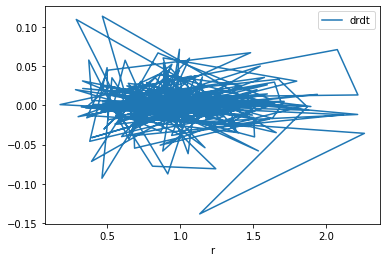

In [107]:
pd.read_csv(retval).plot(x='r',y='drdt')

In [170]:
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
npartitions=os.cpu_count()
input_fn_lst=get_log_files(trial_folder_name, extension='/trajectories/', trgt='.csv')
# input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='.csv')
# # input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')
print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

We're about to use 12 cores to obliterate 324 trajectory files from /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025


In [171]:
# npartitions=11
# WARNING: this took 8 hours for 200 trials over 12 cores...  but was this for 
# ^this suggests a run time of ~30 minutes per file
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
beep(3)

list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
print(f"wrote {len(list_of_files)} output files to a common folder")
assert (len(list_of_files)>0)

Process ForkPoolWorker-12:
Traceback (most recent call last):
  File "/home/timothytyree/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/timothytyree/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/timothytyree/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/timothytyree/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/home/timothytyree/anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/timothytyree/anaconda3/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/timothytyree/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrup

KeyboardInterrupt: 

In [220]:
find_list_of_files=True
folder_name=f'/radial_neighbor_velocities_framemin_{frame_min}_numframesbetween_{num_frames_between}_maxdistthrsh_5/'
if find_list_of_files:
    #TODO: gine all files successfully saved for computing dRdt in bulk
    trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
    npartitions=os.cpu_count()
    list_of_files=get_log_files(trial_folder_name, extension=folder_name, trgt='.csv')
    assert (len(list_of_files)>0)
    print(len(list_of_files))
    # input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='.csv')
    # # input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')
    # print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

53


In [221]:
#merge all csv files into one big-ol' csv file
file_in=os.path.join(trial_folder_name,f'drdt_numfiles.csv')
# file_in=os.path.join(trial_folder_name,f'drdt.csv')
reval=produce_one_csv(list_of_files, file_in)#, encoding="utf-8")
print('merged results saved in:')
print(file_in)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/drdt_numfiles.csv


0

In [222]:
#DONE: check routine_for_computing_dRdt_in_bulk outputs R in cm and dRdt in cm/s
# ^that computes DS=ds/width and passes DS to comp_radial_velocities_between_frames, which scales output from raw according to 
# #compute dRdt and average R for those tips
# dRdt_out=DS*(R_nxt-R_prv)/DT
# #optionally, measure range from previous time point only
# if use_forward_R:
#     R_out=R_prv
# else:
#     R_out=DS*0.5*(R_nxt+R_prv)

#all drdt for all bulk in 
# file_in="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/drdt.csv"

#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
df_in.head()

,index,r,drdt
0,0,0.039262,2.818059
1,1,0.091092,1.328298
2,2,0.120518,1.025830
3,3,0.113784,-0.307453
4,4,0.105157,-0.382774


In [238]:
bins=20#30#'auto'#
#extract values
r_values=df_in['r'].values
drdt_values=df_in['drdt'].values

from lib.measure.bootstrap import bin_and_bootstrap_xy_values
import dask.bag as db
num_bootstrap_samples=1000
min_numobs=None
# file_in='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/drdt.csv'
npartitions=os.cpu_count()
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
#extract values
xlabel='r'
ylabel='drdt'
x_values=df_in[xlabel].values
y_values=df_in[ylabel].values

#bin and bootstrap results
npartitions=os.cpu_count()
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel=xlabel,
                                       ylabel=ylabel,
                                       bins=bins,
                                       min_numobs=min_numobs,
                                       num_bootstrap_samples=num_bootstrap_samples,
                                       npartitions=npartitions)
df_drdt = pd.DataFrame(dict_out)
df_drdt.head()

,r,drdt,Delta_r,Delta_drdt,p_r,p_drdt,counts
0,0.012851,-0.147951,0.000441,0.083114,0.938518,0.926552,55
1,0.019553,-0.078828,0.000553,0.219497,0.239237,0.688765,51
2,0.026204,-0.117456,0.000492,0.212602,0.942949,0.114253,68
3,0.033644,-0.078760,0.000422,0.162930,0.216673,0.350019,91
4,0.040185,-0.001106,0.000319,0.138084,0.488102,0.611153,137


In [239]:
#save ensemble drdt
#merge all csv files into one big-ol' csv file
# file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'ensemble_drdt_bins_{bins}.csv')
file_out=os.path.join(os.path.dirname(file_in),f'ensemble_drdt_numfiles_{num_files}_bins_{bins}.csv')
df_drdt.to_csv(file_out,index=False)
print('merged results saved in:')
print(file_out)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/ensemble_drdt_numfiles_24_bins_20.csv


0

In [255]:
#compute the fit
df=df_drdt
rmin=0. #cm
rmax=4 #cm
tscale=0.001 #sec per ms
lscale=1. #cm per cm
r_values=df['r'].values*lscale
drdt_values=df['drdt'].values/tscale*lscale
Delta_r_values=df['Delta_r'].values*lscale
Delta_drdt_values=df['Delta_drdt'].values/tscale*lscale
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"varkappa_apparent={dict_force_fit['m']:.3f}+-{dict_force_fit['Delta_m']:.3f}")
print(f"the ols fit was computed from {rmin:.3f} to {rmax:.3f} cm:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"trial_folder_name: {trial_folder_name}")

varkappa_apparent=-3.368+-3.946
the ols fit for particle model:
m=-3.3675446259253694
Delta_m=3.9458670660851807
b=52.066897214350476
Delta_b=109.45828743221587
Rsquared=0.14884744559965385
Nobs= 224 +- 137
trial_folder_name: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025


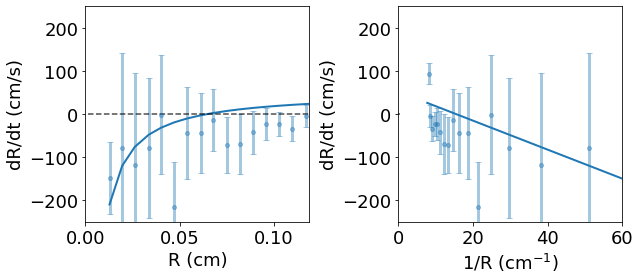

In [265]:
ylim=250#25
c='C0'
yscale=1.
xlim=np.max(x_values)-.01
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
PlotMeanRadialVelocities(axs, x_values, y_values*yscale, y_err_values*yscale, y_hat_values*yscale,c=c,#c='C3',
    alpha=0.4,
    fontsize=18,
    elinewidth=3,
    markersize=4,
    capsize=3,
    xlim0=[0, xlim],
    xlim1=[0, 60])#4])
axs[0].plot(x_values*1.1-np.min(x_values),0.*x_values,'k--',alpha=0.7)
axs[1].plot((x_values-np.min(x_values))*5,0.*x_values,'k--',alpha=0.7)
axs[0].set_ylim([-ylim,ylim])

axs[1].set_ylim([-ylim,ylim])
plt.tight_layout()
plt.show()

In [247]:
#extract values
r_values=df_in['r'].values
drdt_values=df_in['drdt'].values

from lib.measure.bootstrap import bin_and_bootstrap_xy_values
import dask.bag as db
num_bootstrap_samples=1000
bins='auto'
min_numobs=None
# file_in='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/drdt.csv'
npartitions=os.cpu_count()
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
#extract values
xlabel='r'
ylabel='drdt'
x_values=df_in[xlabel].values
y_values=df_in[ylabel].values

In [248]:
#extract values
npartitions=os.cpu_count()
#extract values
xlabel='r'
ylabel='rdrdt'
x_values=df_in['r'].values
y_values=df_in['drdt'].values*x_values
num_bootstrap_samples=1000
min_numobs=None
#bin and bootstrap results
bins=30#'auto'
npartitions=os.cpu_count()
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel=xlabel,
                                       ylabel=ylabel,
                                       bins=bins,
                                       min_numobs=min_numobs,
                                       num_bootstrap_samples=num_bootstrap_samples,
                                       npartitions=npartitions)
df_rdrdt = pd.DataFrame(dict_out)
df_rdrdt.head()

,r,rdrdt,Delta_r,Delta_rdrdt,p_r,p_rdrdt,counts
0,0.013127,-0.001786,0.000394,0.001218,0.200790,0.127349,51
1,0.018182,-0.003487,0.000487,0.004175,0.883170,0.407429,30
2,0.022815,-0.001033,0.000385,0.006096,0.570392,0.729025,46
3,0.027537,-0.002591,0.000383,0.007466,0.879204,0.608045,43
4,0.032086,-0.001984,0.000356,0.007266,0.092599,0.998611,52


In [249]:
#estimate varkappa using weighted average
xmin=0
xmax=1
x=df_rdrdt[xlabel].values
boo=(x>=xmin)&(x<=xmax)
y=df_rdrdt[ylabel].values[boo]/xscale
y_err=df_rdrdt[f'Delta_{ylabel}'].values[boo]/xscale
w=df_rdrdt['counts'].values[boo]
w=w/np.sum(w)
varkappa_apparent=np.sum(w*y)
#estimate 95% CI of D_apparent using a weighted average
Delta_varkappa_apparent=np.sqrt(np.sum(w*y_err**2))
print(f"The weighted average of each R bin was")
print(f"varkappa_apparent={varkappa_apparent:.4f}+-{Delta_varkappa_apparent:.4f} cm^2/s")
print(f"The mean distance between two R bins was {np.mean(np.diff(x[boo])):.3f} cm")
print(f"This weighted average considered {xmin}<=R<={xmax} cm")

The weighted average of each R bin was
varkappa_apparent=-0.9137+-5.6397 cm^2/s
The mean distance between two R bins was 0.005 cm
This weighted average considered 0<=R<=1 cm


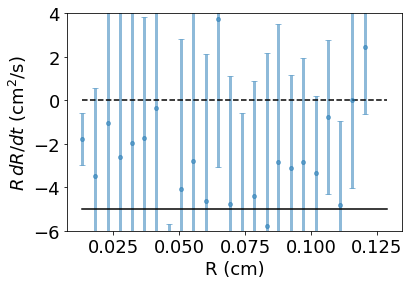

In [219]:
from lib.viewer.bluf.plot_func import *
xscale=0.001
fontsize=18
alpha=0.5
c='C0'
elinewidth=3
markersize=4
capsize=3
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
#naive plot of dRdt*R versus R
x=df_rdrdt[xlabel].values
y=df_rdrdt[ylabel].values/xscale
y_err=df_rdrdt[f'Delta_{ylabel}'].values/xscale
ax.errorbar(x,y,y_err,c=c,
            alpha=alpha,
            fmt='o',
            markersize=markersize,
            ecolor=c,
            elinewidth=elinewidth,
            errorevery=1,
            capsize=capsize
           )
ax.plot(x,0.*x-5,'k-')
ax.plot(x,0.*x,'k--')
ax.set_ylim([-6,4])
format_plot_general(ax=ax,xlabel=r'R (cm)',ylabel=r'$R\,dR/dt$ (cm$^2$/s)',fontsize=fontsize,use_loglog=False)#,**kwargs)
plt.show()

In [ ]:
beep(3)

# compute drdt versus r conditioning on annihilation occuring

In [ ]:
# #DONE: attraction with annihilation and with diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log3_log.csv"

#TODO: attraction with annihilation but without diffusion
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"

ds=10
width=10
pid_col='pid_explicit'

#LR
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.21_traj_sr_600_mem_0.csv'
# # # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic004.13_traj_sr_600_mem_0.csv'

# #FK
# # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# ds=5
# width=200

height=width
df=pd.read_csv(input_fn);print(input_fn)
DT=get_DT(df,pid_col=pid_col);print(f"the time resolution is {DT} ms.")
DS=ds/width

In [ ]:
trgt=input_fn[input_fn.find('_traj_'):]
# trgt='_traj_sr_600_mem_0.csv'
assert(input_fn[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(input_fn,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

In [ ]:
# #particle model
min_duration=0  #20. #ms
min_range   =0  #cm  # a pair of spiral tips is considered if their max distance is at least min_range
filter_beginning=True
use_min_duration=True
use_grad_voltage=False
range_threshold=10 #cm #filter any deaths occurring at ranges exceeding range_threshold
round_t_to_n_digits=5
tmin=0.  #filter all times earlier than tmin? i think so?

# #full model
# min_duration=20##20. #ms
# min_range   =1.  #cm
# filter_beginning=True
# use_min_duration=True
# use_grad_voltage=True
# tmin=100#ms


# npartitions=1#1
npartitions=os.cpu_count()
kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
    'npartitions':npartitions,
    'filter_beginning':filter_beginning,
    'use_grad_voltage':use_grad_voltage,
    'use_min_duration':use_min_duration,
    'range_threshold':range_threshold,
    'round_t_to_n_digits':round_t_to_n_digits,
    'tmin':tmin,
    'pid_col':pid_col
}
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)
def routine(input_fn):
    try:
        return routine_traj_to_annihilation(input_fn)
    except Exception as e:
        return f"Warning: something went wrong, {e}"

In [ ]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")
print(f"token example fn: {input_fn_lst[0]}")
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

In [ ]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]

In [ ]:
assert (len(list_of_files)>0)

In [ ]:
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'annihilations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

In [ ]:
# bins='auto'
bins=30

#200 trials looked fine
# aggregated_fn='/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/general_numframesbetween_1_dropshorterthan_150.csv'
#8 trials was too messy
#TODO: determine the minimum number of trials needed to ACCURATELY and REPRODUCIBLY measure the parameters input to the particle model

# particle model with diffusion, annihilation, and attraction
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations_minr_1_mindur_20.csv"

input_fn=file_out

output_fn=save_mean_radial_velocities(input_fn,t_col='tdeath',bins=bins)

aggregated_fn=output_fn
print(output_fn)

# input_fn=aggregated_fn
df=pd.read_csv(aggregated_fn)
df.head()

In [ ]:
R_values=df['r'].values
dRdt_values=df['drdt'].values

In [ ]:
# npartitions=os.cpu_count()
# # (optional) bootstrap the output
# dict_out = bin_and_bootstrap_xy_values(x=R_values,
#                                        y=dRdt_values,
#                                        xlabel='r',
#                                        ylabel='drdt',
#                                        bins=bins,
#                                        min_numobs=None,
#                                        num_bootstrap_samples=1000,
#                                        npartitions=npartitions)
# df_drdt = pd.DataFrame(dict_out)
# print(type(dict_out))

# #save df as csv
# save_fn=aggregated_fn.replace('.csv',f'_bins_{bins}.csv')
# df_drdt.to_csv(save_fn)
# beep(4)

In [ ]:
#compute the fit
# df = df_drdt
df=pd.read_csv(aggregated_fn)
rmin = 0.3  #cm
rmax = 5  #cm

r_values = df['r'].values
drdt_values = df['drdt'].values
Delta_r_values = df['Delta_r'].values
Delta_drdt_values = df['Delta_drdt'].values
counts = df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values = r_values
y_values = drdt_values
x_err_values = Delta_r_values
y_err_values = Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo = (r_values > rmin) & (r_values < rmax)
x = 1 / r_values[boo]
y = drdt_values[boo]
dict_force_fit = compute_95CI_ols(x, y)
y_hat_values = dict_force_fit['b'] + dict_force_fit['m'] / r_values

#(optional) rename specific values
dict_force_fit = dict_force_fit
y_hat_values = y_hat_values

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\naggregated_fn: {aggregated_fn}")

In [ ]:
ylim=0.025
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
PlotMeanRadialVelocities(axs, x_values, y_values, y_err_values, y_hat_values,c='C3')
# PlotMeanRadialVelocities(axs, x_values2, y_values2, y_err_values2, y_hat_values2,c='C4')
axs[0].set_ylim([-ylim,ylim])
plt.tight_layout()
plt.show()

In [ ]:
xlim=4
ylim=25
# plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(5, 4))
ax.plot(x_values,-1*y_values*x_values*1000)
ax.set_xlim([0,xlim])
ax.set_ylim([0,ylim])
plt.tight_layout()
plt.show()

In [ ]:
ylim=25
xlim=np.max(x_values)
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
PlotMeanRadialVelocities(axs, x_values, y_values, y_err_values, y_hat_values,c='C3',
                            alpha=0.4,
    fontsize=18,
    elinewidth=3,
    markersize=4,
    capsize=3,
    xlim0=[0, xlim],
    xlim1=[0, 4])
axs[0].plot(x_values*1.1-np.min(x_values),0.*x_values,'k--',alpha=0.7)
axs[1].plot(x_values*2.1-np.min(x_values),0.*x_values,'k--',alpha=0.7)
axs[0].set_ylim([-ylim,ylim])
axs[1].set_ylim([-ylim,ylim])
plt.tight_layout()
plt.show()

In [ ]:
#extract values
r_values=df_in['r'].values
drdt_values=df_in['drdt'].values

from lib.measure.bootstrap import bin_and_bootstrap_xy_values
import dask.bag as db
num_bootstrap_samples=1000
bins='auto'
min_numobs=None
# file_in='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/drdt.csv'
npartitions=os.cpu_count()
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
#extract values
xlabel='r'
ylabel='drdt'
x_values=df_in[xlabel].values
y_values=df_in[ylabel].values

In [ ]:
#extract values
npartitions=os.cpu_count()
#extract values
xlabel='r'
ylabel='rdrdt'
x_values=df_in['r'].values
y_values=df_in['drdt'].values*x_values
num_bootstrap_samples=1000
min_numobs=None
#bin and bootstrap results
bins=30#'auto'
npartitions=os.cpu_count()
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel=xlabel,
                                       ylabel=ylabel,
                                       bins=bins,
                                       min_numobs=min_numobs,
                                       num_bootstrap_samples=num_bootstrap_samples,
                                       npartitions=npartitions)
df_rdrdt = pd.DataFrame(dict_out)
df_rdrdt.head()

In [ ]:
#estimate varkappa using weighted average
xmin=0
xmax=1
x=df_rdrdt[xlabel].values
boo=(x>=xmin)&(x<=xmax)
y=df_rdrdt[ylabel].values[boo]/xscale
y_err=df_rdrdt[f'Delta_{ylabel}'].values[boo]/xscale
w=df_rdrdt['counts'].values[boo]
w=w/np.sum(w)
varkappa_apparent=np.sum(w*y)
#estimate 95% CI of D_apparent using a weighted average
Delta_varkappa_apparent=np.sqrt(np.sum(w*y_err**2))
print(f"The weighted average of each R bin was")
print(f"varkappa_apparent={varkappa_apparent:.4f}+-{Delta_varkappa_apparent:.4f} cm^2/s")
print(f"The mean distance between two R bins was {np.mean(np.diff(x[boo])):.3f} cm")
print(f"This weighted average considered {xmin}<=R<={xmax} cm")

In [ ]:
from lib.viewer.plot_func import *
xscale=0.001
fontsize=18
alpha=0.5
c='C3'
elinewidth=3
markersize=4
capsize=3
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
#naive plot of dRdt*R versus R
x=df_rdrdt[xlabel].values
y=df_rdrdt[ylabel].values/xscale
y_err=df_rdrdt[f'Delta_{ylabel}'].values/xscale
ax.errorbar(x,y,y_err,c=c,
            alpha=alpha,
            fmt='o',
            markersize=markersize,
            ecolor=c,
            elinewidth=elinewidth,
            errorevery=1,
            capsize=capsize
           )
ax.plot(x,0.*x-5,'k-')
ax.plot(x,0.*x,'k--')
ax.set_ylim([-6,4])
format_plot_general(ax,xlabel=r'R (cm)',ylabel=r'$R\,dR/dt$ (cm$^2$/s)',fontsize=fontsize,use_loglog=False)#,**kwargs)
plt.show()

In [ ]:
beep(7)

# TODO: generate measures of varkappa for a full model
1. the Luo-Rudy model

In [ ]:
trial_folder_name_lst=[
    #full model (LR)
    '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025',
    #full model (FK)
    "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025"
]
trial_folder_name=trial_folder_name_lst[0]

# TODO: visually verify there aren't any "annihilations" that look sus.


In [36]:
#DONE: verified that mean radial velocities adds time units but not length units
#DONE: verified that the annihilation computation gives units to the distance between particles
#TODO: filter dRdt events that don't make sense
#TODO: verify that there is 1 trial for each event_id
df=pd.read_csv(input_fn)
df2=pd.read_csv(input_fn2)
print(input_fn)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_50_maxdur_150_minrange_0.5_rangethresh_0.1.csv


In [37]:
#TODO: plot 1 random event_id